In [47]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import random
from ultralytics import YOLO

## 0. Functions

In [48]:
def convert_from_yolo_to_cv2(input_txt, width=28*5, height=28):
    
    updated=[]
    annotations = input_txt.split('\n')[:-1]    
    
    for i in annotations:
        temp = i.split(' ')
        temp[1] = round(float(temp[1])*(width))
        temp[2] = round(float(temp[2])*(height))
        temp[3] = round(float(temp[3])*(width))
        temp[4] = round(float(temp[4])*(height))

        # x min
        x_min = int(temp[1]-temp[3]/2)
        x_max = int(temp[1]+temp[3]/2)
        y_min = int(temp[2]-temp[4]/2)
        y_max = int(temp[2]+temp[4]/2)

        updated.append([temp[0], x_min,x_max,y_min,y_max])
    
    return updated

In [49]:
def get_img_with_boxes(img_sample, ann_sample):
    img_sample = np.array(img_sample)
    
    for i in ann_sample:
        img_sample = cv2.rectangle(np.array(img_sample),
                                   pt1=(i[1],i[4]),
                                   pt2=(i[2],i[3]),
                                   color=(255,255,255), thickness=1)
        img_sample = cv2.putText(img_sample, i[0], (i[1], i[4]),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.3, (255,10,255), 1)
    
    print(sorted([(i[1], i[0]) for i in ann_sample]))
    
    return img_sample

## Run model google 

In [50]:
perturbed_img_path = 'data/google_digit_data/test_cropped_32_fgsm/images'
original_img_path = 'data/google_digit_data/test_cropped_32/images'

In [51]:
model=YOLO('./model_results/model_google_data_32/best.pt')

In [52]:
data = os.listdir(f'./{perturbed_img_path}/')
data_perturbed = sorted(data)
data_org = sorted(data)

In [53]:
display(data_perturbed)
display(data_org)

['10186.png',
 '10230.png',
 '10281.png',
 '10427.png',
 '10453.png',
 '10655.png',
 '10726.png',
 '10784.png',
 '1084.png',
 '10916.png',
 '1095.png',
 '11217.png',
 '11564.png',
 '11606.png',
 '11779.png',
 '11993.png',
 '12201.png',
 '12423.png',
 '12494.png',
 '12541.png',
 '12601.png',
 '12628.png',
 '12751.png',
 '12920.png',
 '1323.png',
 '13364.png',
 '13486.png',
 '13516.png',
 '13533.png',
 '13788.png',
 '14165.png',
 '14375.png',
 '14383.png',
 '14592.png',
 '14612.png',
 '14749.png',
 '14852.png',
 '14862.png',
 '15150.png',
 '15154.png',
 '15259.png',
 '15512.png',
 '15534.png',
 '15702.png',
 '15784.png',
 '16030.png',
 '16058.png',
 '16071.png',
 '16080.png',
 '16337.png',
 '16357.png',
 '16413.png',
 '16489.png',
 '16602.png',
 '16860.png',
 '17018.png',
 '17019.png',
 '1715.png',
 '1753.png',
 '17551.png',
 '1767.png',
 '17713.png',
 '17901.png',
 '18001.png',
 '18040.png',
 '18084.png',
 '18157.png',
 '18170.png',
 '18261.png',
 '18377.png',
 '1867.png',
 '18750.png',

['10186.png',
 '10230.png',
 '10281.png',
 '10427.png',
 '10453.png',
 '10655.png',
 '10726.png',
 '10784.png',
 '1084.png',
 '10916.png',
 '1095.png',
 '11217.png',
 '11564.png',
 '11606.png',
 '11779.png',
 '11993.png',
 '12201.png',
 '12423.png',
 '12494.png',
 '12541.png',
 '12601.png',
 '12628.png',
 '12751.png',
 '12920.png',
 '1323.png',
 '13364.png',
 '13486.png',
 '13516.png',
 '13533.png',
 '13788.png',
 '14165.png',
 '14375.png',
 '14383.png',
 '14592.png',
 '14612.png',
 '14749.png',
 '14852.png',
 '14862.png',
 '15150.png',
 '15154.png',
 '15259.png',
 '15512.png',
 '15534.png',
 '15702.png',
 '15784.png',
 '16030.png',
 '16058.png',
 '16071.png',
 '16080.png',
 '16337.png',
 '16357.png',
 '16413.png',
 '16489.png',
 '16602.png',
 '16860.png',
 '17018.png',
 '17019.png',
 '1715.png',
 '1753.png',
 '17551.png',
 '1767.png',
 '17713.png',
 '17901.png',
 '18001.png',
 '18040.png',
 '18084.png',
 '18157.png',
 '18170.png',
 '18261.png',
 '18377.png',
 '1867.png',
 '18750.png',

In [54]:
for img in data_perturbed:
    model.predict(f'./{perturbed_img_path}/{img}', save_txt=True)


image 1/1 /home/gj2353/e6998-5_final_project/data/google_digit_data/test_cropped_32_fgsm/images/10186.png: 32x32 1 3, 9.2ms
Speed: 0.3ms preprocess, 9.2ms inference, 1.4ms postprocess per image at shape (1, 3, 32, 32)
Results saved to /home/gj2353/ultralytics/runs/detect/predict45
1 label saved to /home/gj2353/ultralytics/runs/detect/predict45/labels

image 1/1 /home/gj2353/e6998-5_final_project/data/google_digit_data/test_cropped_32_fgsm/images/10230.png: 32x32 (no detections), 8.7ms
Speed: 1.5ms preprocess, 8.7ms inference, 0.5ms postprocess per image at shape (1, 3, 32, 32)
Results saved to /home/gj2353/ultralytics/runs/detect/predict45
1 label saved to /home/gj2353/ultralytics/runs/detect/predict45/labels

image 1/1 /home/gj2353/e6998-5_final_project/data/google_digit_data/test_cropped_32_fgsm/images/10281.png: 32x32 1 10, 9.2ms
Speed: 0.3ms preprocess, 9.2ms inference, 1.3ms postprocess per image at shape (1, 3, 32, 32)
Results saved to /home/gj2353/ultralytics/runs/detect/predic

Speed: 0.2ms preprocess, 8.6ms inference, 1.1ms postprocess per image at shape (1, 3, 32, 32)
Results saved to /home/gj2353/ultralytics/runs/detect/predict45
17 labels saved to /home/gj2353/ultralytics/runs/detect/predict45/labels

image 1/1 /home/gj2353/e6998-5_final_project/data/google_digit_data/test_cropped_32_fgsm/images/12920.png: 32x32 1 8, 8.6ms
Speed: 0.2ms preprocess, 8.6ms inference, 1.2ms postprocess per image at shape (1, 3, 32, 32)
Results saved to /home/gj2353/ultralytics/runs/detect/predict45
18 labels saved to /home/gj2353/ultralytics/runs/detect/predict45/labels

image 1/1 /home/gj2353/e6998-5_final_project/data/google_digit_data/test_cropped_32_fgsm/images/1323.png: 32x32 1 3, 1 8, 8.8ms
Speed: 0.2ms preprocess, 8.8ms inference, 1.2ms postprocess per image at shape (1, 3, 32, 32)
Results saved to /home/gj2353/ultralytics/runs/detect/predict45
19 labels saved to /home/gj2353/ultralytics/runs/detect/predict45/labels

image 1/1 /home/gj2353/e6998-5_final_project/data/go

Results saved to /home/gj2353/ultralytics/runs/detect/predict45
37 labels saved to /home/gj2353/ultralytics/runs/detect/predict45/labels

image 1/1 /home/gj2353/e6998-5_final_project/data/google_digit_data/test_cropped_32_fgsm/images/16030.png: 32x32 1 5, 1 10, 9.6ms
Speed: 0.3ms preprocess, 9.6ms inference, 1.3ms postprocess per image at shape (1, 3, 32, 32)
Results saved to /home/gj2353/ultralytics/runs/detect/predict45
38 labels saved to /home/gj2353/ultralytics/runs/detect/predict45/labels

image 1/1 /home/gj2353/e6998-5_final_project/data/google_digit_data/test_cropped_32_fgsm/images/16058.png: 32x32 1 1, 1 2, 9.3ms
Speed: 0.3ms preprocess, 9.3ms inference, 1.3ms postprocess per image at shape (1, 3, 32, 32)
Results saved to /home/gj2353/ultralytics/runs/detect/predict45
39 labels saved to /home/gj2353/ultralytics/runs/detect/predict45/labels

image 1/1 /home/gj2353/e6998-5_final_project/data/google_digit_data/test_cropped_32_fgsm/images/16071.png: 32x32 1 2, 1 7, 1 8, 9.2ms
Speed


image 1/1 /home/gj2353/e6998-5_final_project/data/google_digit_data/test_cropped_32_fgsm/images/18170.png: 32x32 1 2, 1 5, 9.0ms
Speed: 0.2ms preprocess, 9.0ms inference, 1.1ms postprocess per image at shape (1, 3, 32, 32)
Results saved to /home/gj2353/ultralytics/runs/detect/predict45
58 labels saved to /home/gj2353/ultralytics/runs/detect/predict45/labels

image 1/1 /home/gj2353/e6998-5_final_project/data/google_digit_data/test_cropped_32_fgsm/images/18261.png: 32x32 2 2s, 1 4, 9.0ms
Speed: 0.2ms preprocess, 9.0ms inference, 1.3ms postprocess per image at shape (1, 3, 32, 32)
Results saved to /home/gj2353/ultralytics/runs/detect/predict45
59 labels saved to /home/gj2353/ultralytics/runs/detect/predict45/labels

image 1/1 /home/gj2353/e6998-5_final_project/data/google_digit_data/test_cropped_32_fgsm/images/18377.png: 32x32 1 10, 8.6ms
Speed: 0.2ms preprocess, 8.6ms inference, 1.2ms postprocess per image at shape (1, 3, 32, 32)
Results saved to /home/gj2353/ultralytics/runs/detect/pre

Speed: 0.2ms preprocess, 9.0ms inference, 1.2ms postprocess per image at shape (1, 3, 32, 32)
Results saved to /home/gj2353/ultralytics/runs/detect/predict45
77 labels saved to /home/gj2353/ultralytics/runs/detect/predict45/labels

image 1/1 /home/gj2353/e6998-5_final_project/data/google_digit_data/test_cropped_32_fgsm/images/20798.png: 32x32 1 3, 1 4, 8.7ms
Speed: 0.2ms preprocess, 8.7ms inference, 1.2ms postprocess per image at shape (1, 3, 32, 32)
Results saved to /home/gj2353/ultralytics/runs/detect/predict45
78 labels saved to /home/gj2353/ultralytics/runs/detect/predict45/labels

image 1/1 /home/gj2353/e6998-5_final_project/data/google_digit_data/test_cropped_32_fgsm/images/2082.png: 32x32 1 3, 9.4ms
Speed: 0.2ms preprocess, 9.4ms inference, 1.1ms postprocess per image at shape (1, 3, 32, 32)
Results saved to /home/gj2353/ultralytics/runs/detect/predict45
79 labels saved to /home/gj2353/ultralytics/runs/detect/predict45/labels

image 1/1 /home/gj2353/e6998-5_final_project/data/go

Results saved to /home/gj2353/ultralytics/runs/detect/predict45
95 labels saved to /home/gj2353/ultralytics/runs/detect/predict45/labels

image 1/1 /home/gj2353/e6998-5_final_project/data/google_digit_data/test_cropped_32_fgsm/images/23354.png: 32x32 1 4, 1 10, 8.9ms
Speed: 0.2ms preprocess, 8.9ms inference, 1.1ms postprocess per image at shape (1, 3, 32, 32)
Results saved to /home/gj2353/ultralytics/runs/detect/predict45
96 labels saved to /home/gj2353/ultralytics/runs/detect/predict45/labels

image 1/1 /home/gj2353/e6998-5_final_project/data/google_digit_data/test_cropped_32_fgsm/images/234.png: 32x32 1 5, 1 9, 8.5ms
Speed: 0.2ms preprocess, 8.5ms inference, 1.2ms postprocess per image at shape (1, 3, 32, 32)
Results saved to /home/gj2353/ultralytics/runs/detect/predict45
97 labels saved to /home/gj2353/ultralytics/runs/detect/predict45/labels

image 1/1 /home/gj2353/e6998-5_final_project/data/google_digit_data/test_cropped_32_fgsm/images/23470.png: 32x32 (no detections), 8.3ms
Speed


image 1/1 /home/gj2353/e6998-5_final_project/data/google_digit_data/test_cropped_32_fgsm/images/24835.png: 32x32 1 6, 9.0ms
Speed: 0.2ms preprocess, 9.0ms inference, 1.0ms postprocess per image at shape (1, 3, 32, 32)
Results saved to /home/gj2353/ultralytics/runs/detect/predict45
115 labels saved to /home/gj2353/ultralytics/runs/detect/predict45/labels

image 1/1 /home/gj2353/e6998-5_final_project/data/google_digit_data/test_cropped_32_fgsm/images/25166.png: 32x32 1 4, 8.7ms
Speed: 0.2ms preprocess, 8.7ms inference, 1.1ms postprocess per image at shape (1, 3, 32, 32)
Results saved to /home/gj2353/ultralytics/runs/detect/predict45
116 labels saved to /home/gj2353/ultralytics/runs/detect/predict45/labels

image 1/1 /home/gj2353/e6998-5_final_project/data/google_digit_data/test_cropped_32_fgsm/images/25182.png: 32x32 1 3, 1 5, 8.8ms
Speed: 0.2ms preprocess, 8.8ms inference, 1.1ms postprocess per image at shape (1, 3, 32, 32)
Results saved to /home/gj2353/ultralytics/runs/detect/predict4

Speed: 0.2ms preprocess, 8.5ms inference, 1.1ms postprocess per image at shape (1, 3, 32, 32)
Results saved to /home/gj2353/ultralytics/runs/detect/predict45
137 labels saved to /home/gj2353/ultralytics/runs/detect/predict45/labels

image 1/1 /home/gj2353/e6998-5_final_project/data/google_digit_data/test_cropped_32_fgsm/images/27954.png: 32x32 1 1, 1 6, 8.4ms
Speed: 0.2ms preprocess, 8.4ms inference, 1.1ms postprocess per image at shape (1, 3, 32, 32)
Results saved to /home/gj2353/ultralytics/runs/detect/predict45
138 labels saved to /home/gj2353/ultralytics/runs/detect/predict45/labels

image 1/1 /home/gj2353/e6998-5_final_project/data/google_digit_data/test_cropped_32_fgsm/images/28329.png: 32x32 1 3, 2 4s, 8.7ms
Speed: 0.2ms preprocess, 8.7ms inference, 1.2ms postprocess per image at shape (1, 3, 32, 32)
Results saved to /home/gj2353/ultralytics/runs/detect/predict45
139 labels saved to /home/gj2353/ultralytics/runs/detect/predict45/labels

image 1/1 /home/gj2353/e6998-5_final_proje

Results saved to /home/gj2353/ultralytics/runs/detect/predict45
157 labels saved to /home/gj2353/ultralytics/runs/detect/predict45/labels

image 1/1 /home/gj2353/e6998-5_final_project/data/google_digit_data/test_cropped_32_fgsm/images/31585.png: 32x32 1 9, 1 10, 8.3ms
Speed: 0.2ms preprocess, 8.3ms inference, 1.1ms postprocess per image at shape (1, 3, 32, 32)
Results saved to /home/gj2353/ultralytics/runs/detect/predict45
158 labels saved to /home/gj2353/ultralytics/runs/detect/predict45/labels

image 1/1 /home/gj2353/e6998-5_final_project/data/google_digit_data/test_cropped_32_fgsm/images/31591.png: 32x32 (no detections), 9.0ms
Speed: 0.2ms preprocess, 9.0ms inference, 0.5ms postprocess per image at shape (1, 3, 32, 32)
Results saved to /home/gj2353/ultralytics/runs/detect/predict45
158 labels saved to /home/gj2353/ultralytics/runs/detect/predict45/labels

image 1/1 /home/gj2353/e6998-5_final_project/data/google_digit_data/test_cropped_32_fgsm/images/31606.png: 32x32 1 1, 8.6ms
Speed


image 1/1 /home/gj2353/e6998-5_final_project/data/google_digit_data/test_cropped_32_fgsm/images/3599.png: 32x32 1 3, 1 4, 8.6ms
Speed: 0.2ms preprocess, 8.6ms inference, 1.1ms postprocess per image at shape (1, 3, 32, 32)
Results saved to /home/gj2353/ultralytics/runs/detect/predict45
178 labels saved to /home/gj2353/ultralytics/runs/detect/predict45/labels

image 1/1 /home/gj2353/e6998-5_final_project/data/google_digit_data/test_cropped_32_fgsm/images/3679.png: 32x32 1 8, 9.1ms
Speed: 0.2ms preprocess, 9.1ms inference, 1.2ms postprocess per image at shape (1, 3, 32, 32)
Results saved to /home/gj2353/ultralytics/runs/detect/predict45
179 labels saved to /home/gj2353/ultralytics/runs/detect/predict45/labels

image 1/1 /home/gj2353/e6998-5_final_project/data/google_digit_data/test_cropped_32_fgsm/images/3708.png: 32x32 1 4, 8.5ms
Speed: 0.2ms preprocess, 8.5ms inference, 1.1ms postprocess per image at shape (1, 3, 32, 32)
Results saved to /home/gj2353/ultralytics/runs/detect/predict45
1

Speed: 0.2ms preprocess, 8.7ms inference, 1.2ms postprocess per image at shape (1, 3, 32, 32)
Results saved to /home/gj2353/ultralytics/runs/detect/predict45
196 labels saved to /home/gj2353/ultralytics/runs/detect/predict45/labels

image 1/1 /home/gj2353/e6998-5_final_project/data/google_digit_data/test_cropped_32_fgsm/images/6451.png: 32x32 1 5, 8.7ms
Speed: 0.2ms preprocess, 8.7ms inference, 1.3ms postprocess per image at shape (1, 3, 32, 32)
Results saved to /home/gj2353/ultralytics/runs/detect/predict45
197 labels saved to /home/gj2353/ultralytics/runs/detect/predict45/labels

image 1/1 /home/gj2353/e6998-5_final_project/data/google_digit_data/test_cropped_32_fgsm/images/649.png: 32x32 1 2, 1 3, 8.6ms
Speed: 0.2ms preprocess, 8.6ms inference, 1.3ms postprocess per image at shape (1, 3, 32, 32)
Results saved to /home/gj2353/ultralytics/runs/detect/predict45
198 labels saved to /home/gj2353/ultralytics/runs/detect/predict45/labels

image 1/1 /home/gj2353/e6998-5_final_project/data/g

Results saved to /home/gj2353/ultralytics/runs/detect/predict45
216 labels saved to /home/gj2353/ultralytics/runs/detect/predict45/labels

image 1/1 /home/gj2353/e6998-5_final_project/data/google_digit_data/test_cropped_32_fgsm/images/6543.png: 32x32 1 4, 1 8, 9.0ms
Speed: 0.2ms preprocess, 9.0ms inference, 1.1ms postprocess per image at shape (1, 3, 32, 32)
Results saved to /home/gj2353/ultralytics/runs/detect/predict45
217 labels saved to /home/gj2353/ultralytics/runs/detect/predict45/labels

image 1/1 /home/gj2353/e6998-5_final_project/data/google_digit_data/test_cropped_32_fgsm/images/6545.png: 32x32 1 5, 1 6, 8.5ms
Speed: 0.2ms preprocess, 8.5ms inference, 1.1ms postprocess per image at shape (1, 3, 32, 32)
Results saved to /home/gj2353/ultralytics/runs/detect/predict45
218 labels saved to /home/gj2353/ultralytics/runs/detect/predict45/labels

image 1/1 /home/gj2353/e6998-5_final_project/data/google_digit_data/test_cropped_32_fgsm/images/6555.png: 32x32 1 2, 1 5, 8.7ms
Speed: 0.2m


image 1/1 /home/gj2353/e6998-5_final_project/data/google_digit_data/test_cropped_32_fgsm/images/6600.png: 32x32 1 3, 2 5s, 9.1ms
Speed: 0.2ms preprocess, 9.1ms inference, 1.1ms postprocess per image at shape (1, 3, 32, 32)
Results saved to /home/gj2353/ultralytics/runs/detect/predict45
238 labels saved to /home/gj2353/ultralytics/runs/detect/predict45/labels

image 1/1 /home/gj2353/e6998-5_final_project/data/google_digit_data/test_cropped_32_fgsm/images/6601.png: 32x32 1 2, 1 3, 8.7ms
Speed: 0.2ms preprocess, 8.7ms inference, 1.1ms postprocess per image at shape (1, 3, 32, 32)
Results saved to /home/gj2353/ultralytics/runs/detect/predict45
239 labels saved to /home/gj2353/ultralytics/runs/detect/predict45/labels

image 1/1 /home/gj2353/e6998-5_final_project/data/google_digit_data/test_cropped_32_fgsm/images/6604.png: 32x32 1 10, 8.6ms
Speed: 0.2ms preprocess, 8.6ms inference, 1.0ms postprocess per image at shape (1, 3, 32, 32)
Results saved to /home/gj2353/ultralytics/runs/detect/pred

Speed: 0.2ms preprocess, 8.9ms inference, 1.1ms postprocess per image at shape (1, 3, 32, 32)
Results saved to /home/gj2353/ultralytics/runs/detect/predict45
258 labels saved to /home/gj2353/ultralytics/runs/detect/predict45/labels

image 1/1 /home/gj2353/e6998-5_final_project/data/google_digit_data/test_cropped_32_fgsm/images/665.png: 32x32 1 1, 1 3, 9.0ms
Speed: 0.2ms preprocess, 9.0ms inference, 1.2ms postprocess per image at shape (1, 3, 32, 32)
Results saved to /home/gj2353/ultralytics/runs/detect/predict45
259 labels saved to /home/gj2353/ultralytics/runs/detect/predict45/labels

image 1/1 /home/gj2353/e6998-5_final_project/data/google_digit_data/test_cropped_32_fgsm/images/6653.png: 32x32 1 2, 1 6, 9.0ms
Speed: 0.2ms preprocess, 9.0ms inference, 1.2ms postprocess per image at shape (1, 3, 32, 32)
Results saved to /home/gj2353/ultralytics/runs/detect/predict45
260 labels saved to /home/gj2353/ultralytics/runs/detect/predict45/labels

image 1/1 /home/gj2353/e6998-5_final_project/d

Results saved to /home/gj2353/ultralytics/runs/detect/predict45
278 labels saved to /home/gj2353/ultralytics/runs/detect/predict45/labels

image 1/1 /home/gj2353/e6998-5_final_project/data/google_digit_data/test_cropped_32_fgsm/images/6710.png: 32x32 1 2, 1 9, 8.8ms
Speed: 0.2ms preprocess, 8.8ms inference, 1.1ms postprocess per image at shape (1, 3, 32, 32)
Results saved to /home/gj2353/ultralytics/runs/detect/predict45
279 labels saved to /home/gj2353/ultralytics/runs/detect/predict45/labels

image 1/1 /home/gj2353/e6998-5_final_project/data/google_digit_data/test_cropped_32_fgsm/images/6712.png: 32x32 1 2, 1 3, 8.8ms
Speed: 0.2ms preprocess, 8.8ms inference, 1.3ms postprocess per image at shape (1, 3, 32, 32)
Results saved to /home/gj2353/ultralytics/runs/detect/predict45
280 labels saved to /home/gj2353/ultralytics/runs/detect/predict45/labels

image 1/1 /home/gj2353/e6998-5_final_project/data/google_digit_data/test_cropped_32_fgsm/images/6716.png: 32x32 1 8, 8.6ms
Speed: 0.2ms pre


image 1/1 /home/gj2353/e6998-5_final_project/data/google_digit_data/test_cropped_32_fgsm/images/6782.png: 32x32 2 2s, 8.5ms
Speed: 0.2ms preprocess, 8.5ms inference, 1.1ms postprocess per image at shape (1, 3, 32, 32)
Results saved to /home/gj2353/ultralytics/runs/detect/predict45
301 labels saved to /home/gj2353/ultralytics/runs/detect/predict45/labels

image 1/1 /home/gj2353/e6998-5_final_project/data/google_digit_data/test_cropped_32_fgsm/images/6792.png: 32x32 1 5, 8.8ms
Speed: 0.2ms preprocess, 8.8ms inference, 1.3ms postprocess per image at shape (1, 3, 32, 32)
Results saved to /home/gj2353/ultralytics/runs/detect/predict45
302 labels saved to /home/gj2353/ultralytics/runs/detect/predict45/labels

image 1/1 /home/gj2353/e6998-5_final_project/data/google_digit_data/test_cropped_32_fgsm/images/6796.png: 32x32 (no detections), 8.7ms
Speed: 0.2ms preprocess, 8.7ms inference, 0.4ms postprocess per image at shape (1, 3, 32, 32)
Results saved to /home/gj2353/ultralytics/runs/detect/pre

Speed: 0.2ms preprocess, 8.5ms inference, 1.1ms postprocess per image at shape (1, 3, 32, 32)
Results saved to /home/gj2353/ultralytics/runs/detect/predict45
321 labels saved to /home/gj2353/ultralytics/runs/detect/predict45/labels

image 1/1 /home/gj2353/e6998-5_final_project/data/google_digit_data/test_cropped_32_fgsm/images/6855.png: 32x32 1 4, 1 5, 8.5ms
Speed: 0.2ms preprocess, 8.5ms inference, 1.1ms postprocess per image at shape (1, 3, 32, 32)
Results saved to /home/gj2353/ultralytics/runs/detect/predict45
322 labels saved to /home/gj2353/ultralytics/runs/detect/predict45/labels

image 1/1 /home/gj2353/e6998-5_final_project/data/google_digit_data/test_cropped_32_fgsm/images/6857.png: 32x32 1 1, 1 8, 8.4ms
Speed: 0.2ms preprocess, 8.4ms inference, 1.3ms postprocess per image at shape (1, 3, 32, 32)
Results saved to /home/gj2353/ultralytics/runs/detect/predict45
323 labels saved to /home/gj2353/ultralytics/runs/detect/predict45/labels

image 1/1 /home/gj2353/e6998-5_final_project/


image 1/1 /home/gj2353/e6998-5_final_project/data/google_digit_data/test_cropped_32_fgsm/images/6912.png: 32x32 1 8, 8.4ms
Speed: 0.2ms preprocess, 8.4ms inference, 1.2ms postprocess per image at shape (1, 3, 32, 32)
Results saved to /home/gj2353/ultralytics/runs/detect/predict45
344 labels saved to /home/gj2353/ultralytics/runs/detect/predict45/labels

image 1/1 /home/gj2353/e6998-5_final_project/data/google_digit_data/test_cropped_32_fgsm/images/6918.png: 32x32 1 3, 1 7, 8.5ms
Speed: 0.2ms preprocess, 8.5ms inference, 1.2ms postprocess per image at shape (1, 3, 32, 32)
Results saved to /home/gj2353/ultralytics/runs/detect/predict45
345 labels saved to /home/gj2353/ultralytics/runs/detect/predict45/labels

image 1/1 /home/gj2353/e6998-5_final_project/data/google_digit_data/test_cropped_32_fgsm/images/6923.png: 32x32 1 2, 8.8ms
Speed: 0.2ms preprocess, 8.8ms inference, 1.2ms postprocess per image at shape (1, 3, 32, 32)
Results saved to /home/gj2353/ultralytics/runs/detect/predict45
3

Speed: 0.2ms preprocess, 8.6ms inference, 1.1ms postprocess per image at shape (1, 3, 32, 32)
Results saved to /home/gj2353/ultralytics/runs/detect/predict45
365 labels saved to /home/gj2353/ultralytics/runs/detect/predict45/labels

image 1/1 /home/gj2353/e6998-5_final_project/data/google_digit_data/test_cropped_32_fgsm/images/6984.png: 32x32 2 2s, 8.4ms
Speed: 0.2ms preprocess, 8.4ms inference, 1.1ms postprocess per image at shape (1, 3, 32, 32)
Results saved to /home/gj2353/ultralytics/runs/detect/predict45
366 labels saved to /home/gj2353/ultralytics/runs/detect/predict45/labels

image 1/1 /home/gj2353/e6998-5_final_project/data/google_digit_data/test_cropped_32_fgsm/images/6985.png: 32x32 1 2, 1 3, 8.5ms
Speed: 0.2ms preprocess, 8.5ms inference, 1.1ms postprocess per image at shape (1, 3, 32, 32)
Results saved to /home/gj2353/ultralytics/runs/detect/predict45
367 labels saved to /home/gj2353/ultralytics/runs/detect/predict45/labels

image 1/1 /home/gj2353/e6998-5_final_project/data


image 1/1 /home/gj2353/e6998-5_final_project/data/google_digit_data/test_cropped_32_fgsm/images/7026.png: 32x32 1 1, 1 2, 2 3s, 9.1ms
Speed: 0.2ms preprocess, 9.1ms inference, 1.2ms postprocess per image at shape (1, 3, 32, 32)
Results saved to /home/gj2353/ultralytics/runs/detect/predict45
386 labels saved to /home/gj2353/ultralytics/runs/detect/predict45/labels

image 1/1 /home/gj2353/e6998-5_final_project/data/google_digit_data/test_cropped_32_fgsm/images/7029.png: 32x32 1 6, 8.5ms
Speed: 0.2ms preprocess, 8.5ms inference, 1.1ms postprocess per image at shape (1, 3, 32, 32)
Results saved to /home/gj2353/ultralytics/runs/detect/predict45
387 labels saved to /home/gj2353/ultralytics/runs/detect/predict45/labels

image 1/1 /home/gj2353/e6998-5_final_project/data/google_digit_data/test_cropped_32_fgsm/images/7030.png: 32x32 1 8, 8.6ms
Speed: 0.2ms preprocess, 8.6ms inference, 1.1ms postprocess per image at shape (1, 3, 32, 32)
Results saved to /home/gj2353/ultralytics/runs/detect/predi

Speed: 0.3ms preprocess, 8.5ms inference, 1.2ms postprocess per image at shape (1, 3, 32, 32)
Results saved to /home/gj2353/ultralytics/runs/detect/predict45
405 labels saved to /home/gj2353/ultralytics/runs/detect/predict45/labels

image 1/1 /home/gj2353/e6998-5_final_project/data/google_digit_data/test_cropped_32_fgsm/images/7081.png: 32x32 2 2s, 8.6ms
Speed: 0.2ms preprocess, 8.6ms inference, 1.1ms postprocess per image at shape (1, 3, 32, 32)
Results saved to /home/gj2353/ultralytics/runs/detect/predict45
406 labels saved to /home/gj2353/ultralytics/runs/detect/predict45/labels

image 1/1 /home/gj2353/e6998-5_final_project/data/google_digit_data/test_cropped_32_fgsm/images/7084.png: 32x32 (no detections), 8.7ms
Speed: 0.2ms preprocess, 8.7ms inference, 0.4ms postprocess per image at shape (1, 3, 32, 32)
Results saved to /home/gj2353/ultralytics/runs/detect/predict45
406 labels saved to /home/gj2353/ultralytics/runs/detect/predict45/labels

image 1/1 /home/gj2353/e6998-5_final_proje

Results saved to /home/gj2353/ultralytics/runs/detect/predict45
424 labels saved to /home/gj2353/ultralytics/runs/detect/predict45/labels

image 1/1 /home/gj2353/e6998-5_final_project/data/google_digit_data/test_cropped_32_fgsm/images/7130.png: 32x32 1 4, 1 10, 8.6ms
Speed: 0.2ms preprocess, 8.6ms inference, 1.1ms postprocess per image at shape (1, 3, 32, 32)
Results saved to /home/gj2353/ultralytics/runs/detect/predict45
425 labels saved to /home/gj2353/ultralytics/runs/detect/predict45/labels

image 1/1 /home/gj2353/e6998-5_final_project/data/google_digit_data/test_cropped_32_fgsm/images/7132.png: 32x32 2 2s, 1 10, 8.4ms
Speed: 0.2ms preprocess, 8.4ms inference, 1.2ms postprocess per image at shape (1, 3, 32, 32)
Results saved to /home/gj2353/ultralytics/runs/detect/predict45
426 labels saved to /home/gj2353/ultralytics/runs/detect/predict45/labels

image 1/1 /home/gj2353/e6998-5_final_project/data/google_digit_data/test_cropped_32_fgsm/images/7133.png: 32x32 1 3, 9.0ms
Speed: 0.2ms 


image 1/1 /home/gj2353/e6998-5_final_project/data/google_digit_data/test_cropped_32_fgsm/images/7200.png: 32x32 1 3, 9.0ms
Speed: 0.2ms preprocess, 9.0ms inference, 1.1ms postprocess per image at shape (1, 3, 32, 32)
Results saved to /home/gj2353/ultralytics/runs/detect/predict45
443 labels saved to /home/gj2353/ultralytics/runs/detect/predict45/labels

image 1/1 /home/gj2353/e6998-5_final_project/data/google_digit_data/test_cropped_32_fgsm/images/7201.png: 32x32 1 2, 8.6ms
Speed: 0.2ms preprocess, 8.6ms inference, 1.2ms postprocess per image at shape (1, 3, 32, 32)
Results saved to /home/gj2353/ultralytics/runs/detect/predict45
444 labels saved to /home/gj2353/ultralytics/runs/detect/predict45/labels

image 1/1 /home/gj2353/e6998-5_final_project/data/google_digit_data/test_cropped_32_fgsm/images/7202.png: 32x32 (no detections), 8.8ms
Speed: 0.2ms preprocess, 8.8ms inference, 0.4ms postprocess per image at shape (1, 3, 32, 32)
Results saved to /home/gj2353/ultralytics/runs/detect/pred

In [55]:
pred_folder='predict45'
# read where the file saves to.
# Also, make sure to restart the kernel if you added new images and
# you want those predictions to be saved to a different pred folder

In [56]:
preds_perturb = os.listdir(f'/home/gj2353/ultralytics/runs/detect/{pred_folder}/labels')
preds_perturb = sorted(preds_perturb)
preds_perturb

perturbed_list=[]
perturbed_ann_list = []

for pred in preds_perturb:
    img = pred.split('.')[0]+'.png'
    perturbed_list.append(np.array(Image.open(f'./{perturbed_img_path}/{img}')))
    
    with open(f'/home/gj2353/ultralytics/runs/detect/{pred_folder}/labels/{pred}', "r") as f:
        sample_annotation = f.read()
        perturbed_ann_list.append(convert_from_yolo_to_cv2(sample_annotation, width=32, height=32))
        f.close()

In [58]:
import shutil
shutil.rmtree(f'/home/gj2353/ultralytics/runs/detect/{pred_folder}/labels')

In [59]:
for img in data_org:
    model.predict(f'./{original_img_path}/{img}', save_txt=True)


image 1/1 /home/gj2353/e6998-5_final_project/data/google_digit_data/test_cropped_32/images/10186.png: 32x32 1 3, 10.0ms
Speed: 0.4ms preprocess, 10.0ms inference, 1.4ms postprocess per image at shape (1, 3, 32, 32)
Results saved to /home/gj2353/ultralytics/runs/detect/predict45
1 label saved to /home/gj2353/ultralytics/runs/detect/predict45/labels

image 1/1 /home/gj2353/e6998-5_final_project/data/google_digit_data/test_cropped_32/images/10230.png: 32x32 1 8, 8.7ms
Speed: 0.2ms preprocess, 8.7ms inference, 1.2ms postprocess per image at shape (1, 3, 32, 32)
Results saved to /home/gj2353/ultralytics/runs/detect/predict45
2 labels saved to /home/gj2353/ultralytics/runs/detect/predict45/labels

image 1/1 /home/gj2353/e6998-5_final_project/data/google_digit_data/test_cropped_32/images/10281.png: 32x32 1 10, 8.9ms
Speed: 0.2ms preprocess, 8.9ms inference, 1.2ms postprocess per image at shape (1, 3, 32, 32)
Results saved to /home/gj2353/ultralytics/runs/detect/predict45
3 labels saved to /h


image 1/1 /home/gj2353/e6998-5_final_project/data/google_digit_data/test_cropped_32/images/12920.png: 32x32 1 7, 1 8, 8.4ms
Speed: 0.2ms preprocess, 8.4ms inference, 1.1ms postprocess per image at shape (1, 3, 32, 32)
Results saved to /home/gj2353/ultralytics/runs/detect/predict45
19 labels saved to /home/gj2353/ultralytics/runs/detect/predict45/labels

image 1/1 /home/gj2353/e6998-5_final_project/data/google_digit_data/test_cropped_32/images/1323.png: 32x32 1 2, 1 3, 1 8, 8.5ms
Speed: 0.2ms preprocess, 8.5ms inference, 1.1ms postprocess per image at shape (1, 3, 32, 32)
Results saved to /home/gj2353/ultralytics/runs/detect/predict45
20 labels saved to /home/gj2353/ultralytics/runs/detect/predict45/labels

image 1/1 /home/gj2353/e6998-5_final_project/data/google_digit_data/test_cropped_32/images/13364.png: 32x32 1 6, 1 8, 8.5ms
Speed: 0.2ms preprocess, 8.5ms inference, 1.2ms postprocess per image at shape (1, 3, 32, 32)
Results saved to /home/gj2353/ultralytics/runs/detect/predict45
2

Results saved to /home/gj2353/ultralytics/runs/detect/predict45
38 labels saved to /home/gj2353/ultralytics/runs/detect/predict45/labels

image 1/1 /home/gj2353/e6998-5_final_project/data/google_digit_data/test_cropped_32/images/16058.png: 32x32 1 1, 1 2, 9.6ms
Speed: 0.2ms preprocess, 9.6ms inference, 1.2ms postprocess per image at shape (1, 3, 32, 32)
Results saved to /home/gj2353/ultralytics/runs/detect/predict45
39 labels saved to /home/gj2353/ultralytics/runs/detect/predict45/labels

image 1/1 /home/gj2353/e6998-5_final_project/data/google_digit_data/test_cropped_32/images/16071.png: 32x32 1 2, 1 7, 1 8, 8.7ms
Speed: 0.2ms preprocess, 8.7ms inference, 1.2ms postprocess per image at shape (1, 3, 32, 32)
Results saved to /home/gj2353/ultralytics/runs/detect/predict45
40 labels saved to /home/gj2353/ultralytics/runs/detect/predict45/labels

image 1/1 /home/gj2353/e6998-5_final_project/data/google_digit_data/test_cropped_32/images/16080.png: 32x32 1 4, 1 7, 8.7ms
Speed: 0.2ms preproce

Speed: 0.2ms preprocess, 8.8ms inference, 1.2ms postprocess per image at shape (1, 3, 32, 32)
Results saved to /home/gj2353/ultralytics/runs/detect/predict45
58 labels saved to /home/gj2353/ultralytics/runs/detect/predict45/labels

image 1/1 /home/gj2353/e6998-5_final_project/data/google_digit_data/test_cropped_32/images/18377.png: 32x32 1 2, 1 10, 8.8ms
Speed: 0.2ms preprocess, 8.8ms inference, 1.1ms postprocess per image at shape (1, 3, 32, 32)
Results saved to /home/gj2353/ultralytics/runs/detect/predict45
59 labels saved to /home/gj2353/ultralytics/runs/detect/predict45/labels

image 1/1 /home/gj2353/e6998-5_final_project/data/google_digit_data/test_cropped_32/images/1867.png: 32x32 1 8, 9.1ms
Speed: 0.2ms preprocess, 9.1ms inference, 1.3ms postprocess per image at shape (1, 3, 32, 32)
Results saved to /home/gj2353/ultralytics/runs/detect/predict45
60 labels saved to /home/gj2353/ultralytics/runs/detect/predict45/labels

image 1/1 /home/gj2353/e6998-5_final_project/data/google_digi


image 1/1 /home/gj2353/e6998-5_final_project/data/google_digit_data/test_cropped_32/images/2082.png: 32x32 1 2, 1 3, 9.4ms
Speed: 0.2ms preprocess, 9.4ms inference, 1.3ms postprocess per image at shape (1, 3, 32, 32)
Results saved to /home/gj2353/ultralytics/runs/detect/predict45
79 labels saved to /home/gj2353/ultralytics/runs/detect/predict45/labels

image 1/1 /home/gj2353/e6998-5_final_project/data/google_digit_data/test_cropped_32/images/20938.png: 32x32 1 2, 1 10, 9.0ms
Speed: 0.2ms preprocess, 9.0ms inference, 1.2ms postprocess per image at shape (1, 3, 32, 32)
Results saved to /home/gj2353/ultralytics/runs/detect/predict45
80 labels saved to /home/gj2353/ultralytics/runs/detect/predict45/labels

image 1/1 /home/gj2353/e6998-5_final_project/data/google_digit_data/test_cropped_32/images/20993.png: 32x32 1 6, 1 8, 8.5ms
Speed: 0.2ms preprocess, 8.5ms inference, 1.1ms postprocess per image at shape (1, 3, 32, 32)
Results saved to /home/gj2353/ultralytics/runs/detect/predict45
81 la

Results saved to /home/gj2353/ultralytics/runs/detect/predict45
98 labels saved to /home/gj2353/ultralytics/runs/detect/predict45/labels

image 1/1 /home/gj2353/e6998-5_final_project/data/google_digit_data/test_cropped_32/images/23470.png: 32x32 (no detections), 8.7ms
Speed: 0.2ms preprocess, 8.7ms inference, 0.5ms postprocess per image at shape (1, 3, 32, 32)
Results saved to /home/gj2353/ultralytics/runs/detect/predict45
98 labels saved to /home/gj2353/ultralytics/runs/detect/predict45/labels

image 1/1 /home/gj2353/e6998-5_final_project/data/google_digit_data/test_cropped_32/images/23499.png: 32x32 1 3, 1 4, 8.7ms
Speed: 0.2ms preprocess, 8.7ms inference, 1.2ms postprocess per image at shape (1, 3, 32, 32)
Results saved to /home/gj2353/ultralytics/runs/detect/predict45
99 labels saved to /home/gj2353/ultralytics/runs/detect/predict45/labels

image 1/1 /home/gj2353/e6998-5_final_project/data/google_digit_data/test_cropped_32/images/23582.png: 32x32 1 5, 8.5ms
Speed: 0.2ms preprocess,

Speed: 0.2ms preprocess, 9.4ms inference, 1.3ms postprocess per image at shape (1, 3, 32, 32)
Results saved to /home/gj2353/ultralytics/runs/detect/predict45
118 labels saved to /home/gj2353/ultralytics/runs/detect/predict45/labels

image 1/1 /home/gj2353/e6998-5_final_project/data/google_digit_data/test_cropped_32/images/25361.png: 32x32 (no detections), 9.0ms
Speed: 0.2ms preprocess, 9.0ms inference, 0.5ms postprocess per image at shape (1, 3, 32, 32)
Results saved to /home/gj2353/ultralytics/runs/detect/predict45
118 labels saved to /home/gj2353/ultralytics/runs/detect/predict45/labels

image 1/1 /home/gj2353/e6998-5_final_project/data/google_digit_data/test_cropped_32/images/25364.png: 32x32 1 3, 1 8, 8.3ms
Speed: 0.2ms preprocess, 8.3ms inference, 1.2ms postprocess per image at shape (1, 3, 32, 32)
Results saved to /home/gj2353/ultralytics/runs/detect/predict45
119 labels saved to /home/gj2353/ultralytics/runs/detect/predict45/labels

image 1/1 /home/gj2353/e6998-5_final_project/d


image 1/1 /home/gj2353/e6998-5_final_project/data/google_digit_data/test_cropped_32/images/28675.png: 32x32 1 2, 1 3, 9.3ms
Speed: 0.2ms preprocess, 9.3ms inference, 1.2ms postprocess per image at shape (1, 3, 32, 32)
Results saved to /home/gj2353/ultralytics/runs/detect/predict45
140 labels saved to /home/gj2353/ultralytics/runs/detect/predict45/labels

image 1/1 /home/gj2353/e6998-5_final_project/data/google_digit_data/test_cropped_32/images/28735.png: 32x32 1 8, 1 10, 8.8ms
Speed: 0.2ms preprocess, 8.8ms inference, 1.2ms postprocess per image at shape (1, 3, 32, 32)
Results saved to /home/gj2353/ultralytics/runs/detect/predict45
141 labels saved to /home/gj2353/ultralytics/runs/detect/predict45/labels

image 1/1 /home/gj2353/e6998-5_final_project/data/google_digit_data/test_cropped_32/images/28856.png: 32x32 1 6, 1 8, 8.6ms
Speed: 0.2ms preprocess, 8.6ms inference, 1.2ms postprocess per image at shape (1, 3, 32, 32)
Results saved to /home/gj2353/ultralytics/runs/detect/predict45
14

Results saved to /home/gj2353/ultralytics/runs/detect/predict45
160 labels saved to /home/gj2353/ultralytics/runs/detect/predict45/labels

image 1/1 /home/gj2353/e6998-5_final_project/data/google_digit_data/test_cropped_32/images/31918.png: 32x32 2 2s, 9.0ms
Speed: 0.2ms preprocess, 9.0ms inference, 1.1ms postprocess per image at shape (1, 3, 32, 32)
Results saved to /home/gj2353/ultralytics/runs/detect/predict45
161 labels saved to /home/gj2353/ultralytics/runs/detect/predict45/labels

image 1/1 /home/gj2353/e6998-5_final_project/data/google_digit_data/test_cropped_32/images/32123.png: 32x32 1 2, 1 3, 8.7ms
Speed: 0.2ms preprocess, 8.7ms inference, 1.1ms postprocess per image at shape (1, 3, 32, 32)
Results saved to /home/gj2353/ultralytics/runs/detect/predict45
162 labels saved to /home/gj2353/ultralytics/runs/detect/predict45/labels

image 1/1 /home/gj2353/e6998-5_final_project/data/google_digit_data/test_cropped_32/images/32174.png: 32x32 1 4, 8.7ms
Speed: 0.2ms preprocess, 8.7ms i

Speed: 0.2ms preprocess, 8.7ms inference, 1.2ms postprocess per image at shape (1, 3, 32, 32)
Results saved to /home/gj2353/ultralytics/runs/detect/predict45
182 labels saved to /home/gj2353/ultralytics/runs/detect/predict45/labels

image 1/1 /home/gj2353/e6998-5_final_project/data/google_digit_data/test_cropped_32/images/3815.png: 32x32 2 8s, 8.6ms
Speed: 0.2ms preprocess, 8.6ms inference, 1.2ms postprocess per image at shape (1, 3, 32, 32)
Results saved to /home/gj2353/ultralytics/runs/detect/predict45
183 labels saved to /home/gj2353/ultralytics/runs/detect/predict45/labels

image 1/1 /home/gj2353/e6998-5_final_project/data/google_digit_data/test_cropped_32/images/3878.png: 32x32 1 3, 1 5, 8.6ms
Speed: 0.2ms preprocess, 8.6ms inference, 1.2ms postprocess per image at shape (1, 3, 32, 32)
Results saved to /home/gj2353/ultralytics/runs/detect/predict45
184 labels saved to /home/gj2353/ultralytics/runs/detect/predict45/labels

image 1/1 /home/gj2353/e6998-5_final_project/data/google_di


image 1/1 /home/gj2353/e6998-5_final_project/data/google_digit_data/test_cropped_32/images/6492.png: 32x32 2 2s, 8.2ms
Speed: 0.2ms preprocess, 8.2ms inference, 1.1ms postprocess per image at shape (1, 3, 32, 32)
Results saved to /home/gj2353/ultralytics/runs/detect/predict45
202 labels saved to /home/gj2353/ultralytics/runs/detect/predict45/labels

image 1/1 /home/gj2353/e6998-5_final_project/data/google_digit_data/test_cropped_32/images/65.png: 32x32 1 4, 1 5, 8.3ms
Speed: 0.2ms preprocess, 8.3ms inference, 1.2ms postprocess per image at shape (1, 3, 32, 32)
Results saved to /home/gj2353/ultralytics/runs/detect/predict45
203 labels saved to /home/gj2353/ultralytics/runs/detect/predict45/labels

image 1/1 /home/gj2353/e6998-5_final_project/data/google_digit_data/test_cropped_32/images/6502.png: 32x32 2 2s, 1 6, 9.1ms
Speed: 0.2ms preprocess, 9.1ms inference, 1.1ms postprocess per image at shape (1, 3, 32, 32)
Results saved to /home/gj2353/ultralytics/runs/detect/predict45
204 labels 

Results saved to /home/gj2353/ultralytics/runs/detect/predict45
223 labels saved to /home/gj2353/ultralytics/runs/detect/predict45/labels

image 1/1 /home/gj2353/e6998-5_final_project/data/google_digit_data/test_cropped_32/images/6561.png: 32x32 1 1, 1 8, 8.7ms
Speed: 0.2ms preprocess, 8.7ms inference, 1.2ms postprocess per image at shape (1, 3, 32, 32)
Results saved to /home/gj2353/ultralytics/runs/detect/predict45
224 labels saved to /home/gj2353/ultralytics/runs/detect/predict45/labels

image 1/1 /home/gj2353/e6998-5_final_project/data/google_digit_data/test_cropped_32/images/6562.png: 32x32 1 7, 8.5ms
Speed: 0.2ms preprocess, 8.5ms inference, 1.1ms postprocess per image at shape (1, 3, 32, 32)
Results saved to /home/gj2353/ultralytics/runs/detect/predict45
225 labels saved to /home/gj2353/ultralytics/runs/detect/predict45/labels

image 1/1 /home/gj2353/e6998-5_final_project/data/google_digit_data/test_cropped_32/images/6563.png: 32x32 2 2s, 1 4, 8.5ms
Speed: 0.2ms preprocess, 8.5ms

Speed: 0.2ms preprocess, 8.9ms inference, 1.1ms postprocess per image at shape (1, 3, 32, 32)
Results saved to /home/gj2353/ultralytics/runs/detect/predict45
245 labels saved to /home/gj2353/ultralytics/runs/detect/predict45/labels

image 1/1 /home/gj2353/e6998-5_final_project/data/google_digit_data/test_cropped_32/images/6612.png: 32x32 1 1, 1 5, 8.8ms
Speed: 0.2ms preprocess, 8.8ms inference, 1.2ms postprocess per image at shape (1, 3, 32, 32)
Results saved to /home/gj2353/ultralytics/runs/detect/predict45
246 labels saved to /home/gj2353/ultralytics/runs/detect/predict45/labels

image 1/1 /home/gj2353/e6998-5_final_project/data/google_digit_data/test_cropped_32/images/6617.png: 32x32 1 7, 8.4ms
Speed: 0.2ms preprocess, 8.4ms inference, 1.2ms postprocess per image at shape (1, 3, 32, 32)
Results saved to /home/gj2353/ultralytics/runs/detect/predict45
247 labels saved to /home/gj2353/ultralytics/runs/detect/predict45/labels

image 1/1 /home/gj2353/e6998-5_final_project/data/google_dig


image 1/1 /home/gj2353/e6998-5_final_project/data/google_digit_data/test_cropped_32/images/666.png: 32x32 1 8, 8.7ms
Speed: 0.2ms preprocess, 8.7ms inference, 1.2ms postprocess per image at shape (1, 3, 32, 32)
Results saved to /home/gj2353/ultralytics/runs/detect/predict45
263 labels saved to /home/gj2353/ultralytics/runs/detect/predict45/labels

image 1/1 /home/gj2353/e6998-5_final_project/data/google_digit_data/test_cropped_32/images/6665.png: 32x32 1 1, 1 5, 8.9ms
Speed: 0.2ms preprocess, 8.9ms inference, 1.2ms postprocess per image at shape (1, 3, 32, 32)
Results saved to /home/gj2353/ultralytics/runs/detect/predict45
264 labels saved to /home/gj2353/ultralytics/runs/detect/predict45/labels

image 1/1 /home/gj2353/e6998-5_final_project/data/google_digit_data/test_cropped_32/images/6668.png: 32x32 1 2, 1 5, 9.2ms
Speed: 0.2ms preprocess, 9.2ms inference, 1.1ms postprocess per image at shape (1, 3, 32, 32)
Results saved to /home/gj2353/ultralytics/runs/detect/predict45
265 labels s

Results saved to /home/gj2353/ultralytics/runs/detect/predict45
284 labels saved to /home/gj2353/ultralytics/runs/detect/predict45/labels

image 1/1 /home/gj2353/e6998-5_final_project/data/google_digit_data/test_cropped_32/images/6728.png: 32x32 2 2s, 8.7ms
Speed: 0.2ms preprocess, 8.7ms inference, 1.2ms postprocess per image at shape (1, 3, 32, 32)
Results saved to /home/gj2353/ultralytics/runs/detect/predict45
285 labels saved to /home/gj2353/ultralytics/runs/detect/predict45/labels

image 1/1 /home/gj2353/e6998-5_final_project/data/google_digit_data/test_cropped_32/images/6730.png: 32x32 1 5, 8.6ms
Speed: 0.2ms preprocess, 8.6ms inference, 1.2ms postprocess per image at shape (1, 3, 32, 32)
Results saved to /home/gj2353/ultralytics/runs/detect/predict45
286 labels saved to /home/gj2353/ultralytics/runs/detect/predict45/labels

image 1/1 /home/gj2353/e6998-5_final_project/data/google_digit_data/test_cropped_32/images/6734.png: 32x32 1 2, 8.6ms
Speed: 0.2ms preprocess, 8.6ms inference

Speed: 0.2ms preprocess, 8.7ms inference, 1.1ms postprocess per image at shape (1, 3, 32, 32)
Results saved to /home/gj2353/ultralytics/runs/detect/predict45
306 labels saved to /home/gj2353/ultralytics/runs/detect/predict45/labels

image 1/1 /home/gj2353/e6998-5_final_project/data/google_digit_data/test_cropped_32/images/6810.png: 32x32 1 9, 8.7ms
Speed: 0.2ms preprocess, 8.7ms inference, 1.2ms postprocess per image at shape (1, 3, 32, 32)
Results saved to /home/gj2353/ultralytics/runs/detect/predict45
307 labels saved to /home/gj2353/ultralytics/runs/detect/predict45/labels

image 1/1 /home/gj2353/e6998-5_final_project/data/google_digit_data/test_cropped_32/images/6812.png: 32x32 1 3, 1 6, 1 7, 8.8ms
Speed: 0.2ms preprocess, 8.8ms inference, 1.1ms postprocess per image at shape (1, 3, 32, 32)
Results saved to /home/gj2353/ultralytics/runs/detect/predict45
308 labels saved to /home/gj2353/ultralytics/runs/detect/predict45/labels

image 1/1 /home/gj2353/e6998-5_final_project/data/googl


image 1/1 /home/gj2353/e6998-5_final_project/data/google_digit_data/test_cropped_32/images/6863.png: 32x32 1 4, 1 9, 8.8ms
Speed: 0.2ms preprocess, 8.8ms inference, 1.2ms postprocess per image at shape (1, 3, 32, 32)
Results saved to /home/gj2353/ultralytics/runs/detect/predict45
327 labels saved to /home/gj2353/ultralytics/runs/detect/predict45/labels

image 1/1 /home/gj2353/e6998-5_final_project/data/google_digit_data/test_cropped_32/images/6866.png: 32x32 1 2, 1 8, 8.8ms
Speed: 0.2ms preprocess, 8.8ms inference, 1.3ms postprocess per image at shape (1, 3, 32, 32)
Results saved to /home/gj2353/ultralytics/runs/detect/predict45
328 labels saved to /home/gj2353/ultralytics/runs/detect/predict45/labels

image 1/1 /home/gj2353/e6998-5_final_project/data/google_digit_data/test_cropped_32/images/6867.png: 32x32 1 6, 9.3ms
Speed: 0.2ms preprocess, 9.3ms inference, 1.2ms postprocess per image at shape (1, 3, 32, 32)
Results saved to /home/gj2353/ultralytics/runs/detect/predict45
329 labels 


image 1/1 /home/gj2353/e6998-5_final_project/data/google_digit_data/test_cropped_32/images/693.png: 32x32 1 3, 1 4, 8.7ms
Speed: 0.2ms preprocess, 8.7ms inference, 1.1ms postprocess per image at shape (1, 3, 32, 32)
Results saved to /home/gj2353/ultralytics/runs/detect/predict45
350 labels saved to /home/gj2353/ultralytics/runs/detect/predict45/labels

image 1/1 /home/gj2353/e6998-5_final_project/data/google_digit_data/test_cropped_32/images/6933.png: 32x32 1 8, 8.8ms
Speed: 0.2ms preprocess, 8.8ms inference, 1.1ms postprocess per image at shape (1, 3, 32, 32)
Results saved to /home/gj2353/ultralytics/runs/detect/predict45
351 labels saved to /home/gj2353/ultralytics/runs/detect/predict45/labels

image 1/1 /home/gj2353/e6998-5_final_project/data/google_digit_data/test_cropped_32/images/6938.png: 32x32 1 4, 1 6, 8.7ms
Speed: 0.2ms preprocess, 8.7ms inference, 1.1ms postprocess per image at shape (1, 3, 32, 32)
Results saved to /home/gj2353/ultralytics/runs/detect/predict45
352 labels s

Results saved to /home/gj2353/ultralytics/runs/detect/predict45
371 labels saved to /home/gj2353/ultralytics/runs/detect/predict45/labels

image 1/1 /home/gj2353/e6998-5_final_project/data/google_digit_data/test_cropped_32/images/7000.png: 32x32 1 3, 8.5ms
Speed: 0.2ms preprocess, 8.5ms inference, 1.1ms postprocess per image at shape (1, 3, 32, 32)
Results saved to /home/gj2353/ultralytics/runs/detect/predict45
372 labels saved to /home/gj2353/ultralytics/runs/detect/predict45/labels

image 1/1 /home/gj2353/e6998-5_final_project/data/google_digit_data/test_cropped_32/images/7001.png: 32x32 1 2, 8.7ms
Speed: 0.2ms preprocess, 8.7ms inference, 1.2ms postprocess per image at shape (1, 3, 32, 32)
Results saved to /home/gj2353/ultralytics/runs/detect/predict45
373 labels saved to /home/gj2353/ultralytics/runs/detect/predict45/labels

image 1/1 /home/gj2353/e6998-5_final_project/data/google_digit_data/test_cropped_32/images/7002.png: 32x32 1 4, 8.6ms
Speed: 0.2ms preprocess, 8.6ms inference,

Speed: 0.2ms preprocess, 8.5ms inference, 1.1ms postprocess per image at shape (1, 3, 32, 32)
Results saved to /home/gj2353/ultralytics/runs/detect/predict45
392 labels saved to /home/gj2353/ultralytics/runs/detect/predict45/labels

image 1/1 /home/gj2353/e6998-5_final_project/data/google_digit_data/test_cropped_32/images/7049.png: 32x32 1 3, 1 5, 8.4ms
Speed: 0.2ms preprocess, 8.4ms inference, 1.2ms postprocess per image at shape (1, 3, 32, 32)
Results saved to /home/gj2353/ultralytics/runs/detect/predict45
393 labels saved to /home/gj2353/ultralytics/runs/detect/predict45/labels

image 1/1 /home/gj2353/e6998-5_final_project/data/google_digit_data/test_cropped_32/images/705.png: 32x32 1 2, 1 4, 8.5ms
Speed: 0.2ms preprocess, 8.5ms inference, 1.1ms postprocess per image at shape (1, 3, 32, 32)
Results saved to /home/gj2353/ultralytics/runs/detect/predict45
394 labels saved to /home/gj2353/ultralytics/runs/detect/predict45/labels

image 1/1 /home/gj2353/e6998-5_final_project/data/google


image 1/1 /home/gj2353/e6998-5_final_project/data/google_digit_data/test_cropped_32/images/71.png: 32x32 1 1, 1 2, 8.5ms
Speed: 0.2ms preprocess, 8.5ms inference, 1.2ms postprocess per image at shape (1, 3, 32, 32)
Results saved to /home/gj2353/ultralytics/runs/detect/predict45
412 labels saved to /home/gj2353/ultralytics/runs/detect/predict45/labels

image 1/1 /home/gj2353/e6998-5_final_project/data/google_digit_data/test_cropped_32/images/7102.png: 32x32 1 7, 8.4ms
Speed: 0.2ms preprocess, 8.4ms inference, 1.1ms postprocess per image at shape (1, 3, 32, 32)
Results saved to /home/gj2353/ultralytics/runs/detect/predict45
413 labels saved to /home/gj2353/ultralytics/runs/detect/predict45/labels

image 1/1 /home/gj2353/e6998-5_final_project/data/google_digit_data/test_cropped_32/images/7103.png: 32x32 1 2, 1 4, 8.4ms
Speed: 0.2ms preprocess, 8.4ms inference, 1.2ms postprocess per image at shape (1, 3, 32, 32)
Results saved to /home/gj2353/ultralytics/runs/detect/predict45
414 labels sa

Results saved to /home/gj2353/ultralytics/runs/detect/predict45
431 labels saved to /home/gj2353/ultralytics/runs/detect/predict45/labels

image 1/1 /home/gj2353/e6998-5_final_project/data/google_digit_data/test_cropped_32/images/7157.png: 32x32 1 2, 1 9, 9.2ms
Speed: 0.2ms preprocess, 9.2ms inference, 1.3ms postprocess per image at shape (1, 3, 32, 32)
Results saved to /home/gj2353/ultralytics/runs/detect/predict45
432 labels saved to /home/gj2353/ultralytics/runs/detect/predict45/labels

image 1/1 /home/gj2353/e6998-5_final_project/data/google_digit_data/test_cropped_32/images/7158.png: 32x32 1 2, 9.1ms
Speed: 0.2ms preprocess, 9.1ms inference, 1.2ms postprocess per image at shape (1, 3, 32, 32)
Results saved to /home/gj2353/ultralytics/runs/detect/predict45
433 labels saved to /home/gj2353/ultralytics/runs/detect/predict45/labels

image 1/1 /home/gj2353/e6998-5_final_project/data/google_digit_data/test_cropped_32/images/7160.png: 32x32 1 4, 9.2ms
Speed: 0.2ms preprocess, 9.2ms infer

Speed: 0.2ms preprocess, 8.7ms inference, 1.1ms postprocess per image at shape (1, 3, 32, 32)
Results saved to /home/gj2353/ultralytics/runs/detect/predict45
450 labels saved to /home/gj2353/ultralytics/runs/detect/predict45/labels


In [60]:
preds_org = os.listdir(f'/home/gj2353/ultralytics/runs/detect/{pred_folder}/labels')
preds_org = sorted(preds_org)
preds_org

org_list=[]
org_ann_list = []

for pred in preds_org:
    img = pred.split('.')[0]+'.png'
    org_list.append(np.array(Image.open(f'./{original_img_path}/{img}')))
    
    with open(f'/home/gj2353/ultralytics/runs/detect/{pred_folder}/labels/{pred}', "r") as f:
        sample_annotation = f.read()
        org_ann_list.append(convert_from_yolo_to_cv2(sample_annotation, width=32, height=32))
        f.close()

1.0


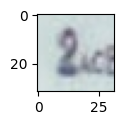

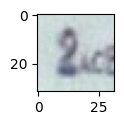

In [61]:
# Check the first image

plt.subplots(figsize=(1,1))
plt.imshow(org_list[0])

plt.subplots(figsize=(1,1))
plt.imshow(perturbed_list[0])

print(np.sum(org_list[0]!=perturbed_list[0])/np.sum(org_list[0]==org_list[0]))

[(5, '2')]


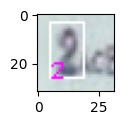

PERTURBED
% difference :  1.0
[(5, '2')]


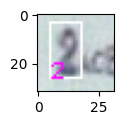

[(23, '7')]


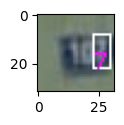

PERTURBED
% difference :  0.9967447916666666
[(7, '9')]


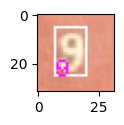

[(6, '9')]


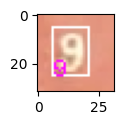

PERTURBED
% difference :  0.9886067708333334
[(4, '5')]


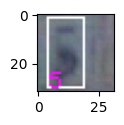

[(4, '5')]


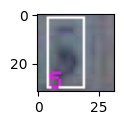

PERTURBED
% difference :  0.99609375
[(6, '1'), (14, '8')]


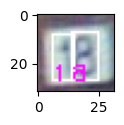

[(7, '1'), (14, '8')]


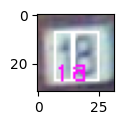

PERTURBED
% difference :  0.9970703125
[(4, '2'), (16, '1')]


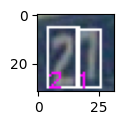

[(4, '2'), (16, '1')]


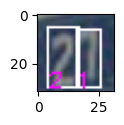

PERTURBED
% difference :  0.9986979166666666
[(5, '3'), (16, '7')]


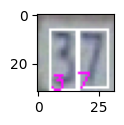

[(5, '3'), (16, '7')]


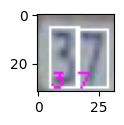

PERTURBED
% difference :  0.9928385416666666
[(2, '1'), (4, '1')]


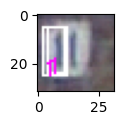

[(2, '1'), (5, '1')]


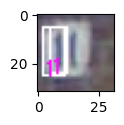

PERTURBED
% difference :  0.9996744791666666
[(5, '2'), (14, '5')]


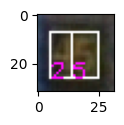

[(15, '5')]


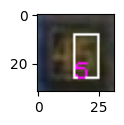

PERTURBED
% difference :  1.0
[(1, '5')]


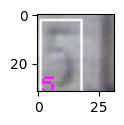

[(2, '5')]


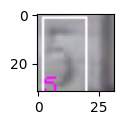

PERTURBED
% difference :  1.0
[(3, '2')]


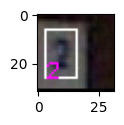

[(4, '2')]


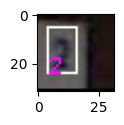

PERTURBED
% difference :  0.9934895833333334
[(9, '5')]


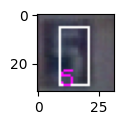

[(7, '5')]


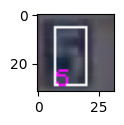

PERTURBED
% difference :  0.9840494791666666
[(6, '1'), (14, '6')]


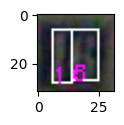

[(5, '1'), (14, '6')]


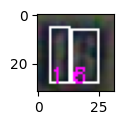

PERTURBED
% difference :  1.0
[(11, '6')]


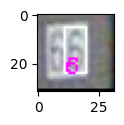

[(11, '6')]


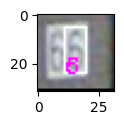

PERTURBED
% difference :  0.9954427083333334
[(4, '7')]


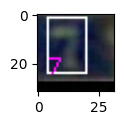

[(3, '7')]


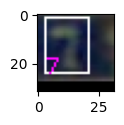

PERTURBED
% difference :  0.9928385416666666
[(12, '4')]


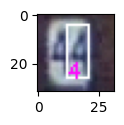

[(13, '4')]


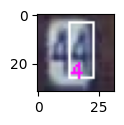

PERTURBED
% difference :  0.9889322916666666
[(6, '4')]


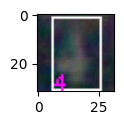

[(6, '4')]


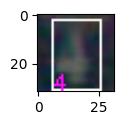

PERTURBED
% difference :  0.9973958333333334
[(2, '4'), (20, '1')]


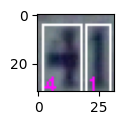

[(1, '4'), (20, '1')]


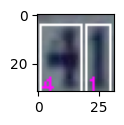

PERTURBED
% difference :  0.9915364583333334
[(6, '7')]


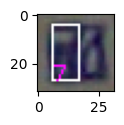

[(6, '7'), (17, '6')]


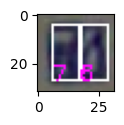

PERTURBED
% difference :  0.9954427083333334
[(10, '7'), (15, '2')]


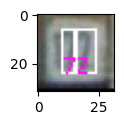

[(5, '1'), (11, '7'), (15, '2')]


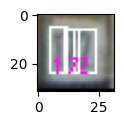

PERTURBED
% difference :  0.9921875
[(3, '5'), (12, '7')]


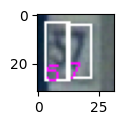

[(3, '5'), (12, '7')]


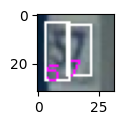

PERTURBED
% difference :  0.9918619791666666
[(9, '7'), (12, '7'), (22, '5')]


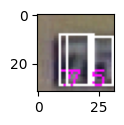

[(9, '7'), (11, '7'), (22, '5')]


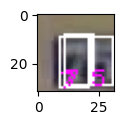

PERTURBED
% difference :  0.9990234375
[(12, '0')]


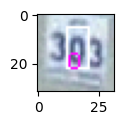

[(8, '1'), (15, '1')]


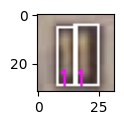

PERTURBED
% difference :  1.0
[(8, '1'), (15, '1')]


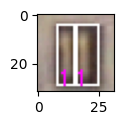

[(0, '1'), (7, '2'), (20, '1')]


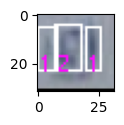

PERTURBED
% difference :  0.9817708333333334
[(0, '1'), (7, '2'), (20, '1')]


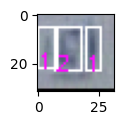

[(6, '1'), (13, '2')]


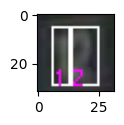

PERTURBED
% difference :  1.0
[(5, '1'), (13, '2')]


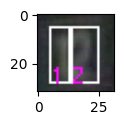

[(5, '3')]


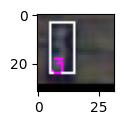

PERTURBED
% difference :  0.9612630208333334
[(5, '3')]


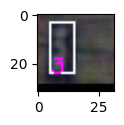

[(8, '3'), (8, '5'), (19, '9')]


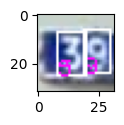

PERTURBED
% difference :  0.9938151041666666
[(8, '3'), (8, '5'), (20, '9')]


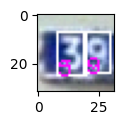

[(4, '1'), (14, '7')]


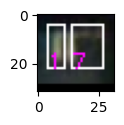

PERTURBED
% difference :  0.9495442708333334
[(4, '1')]


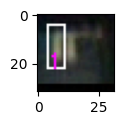

[(2, '1'), (11, '7')]


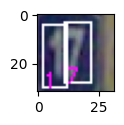

PERTURBED
% difference :  1.0
[(2, '1'), (11, '7')]


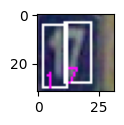

[(5, '1'), (13, '7')]


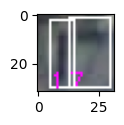

PERTURBED
% difference :  1.0
[(5, '1'), (14, '7')]


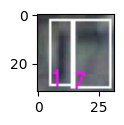

[(18, '0')]


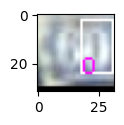

PERTURBED
% difference :  0.9632161458333334
[(5, '3'), (18, '0')]


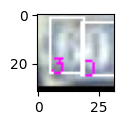

[(2, '1'), (5, '1'), (11, '2')]


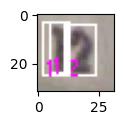

PERTURBED
% difference :  1.0
[(3, '1'), (5, '1'), (11, '2')]


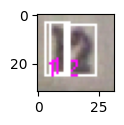

[(7, '3'), (22, '7')]


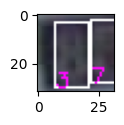

PERTURBED
% difference :  1.0
[(6, '3')]


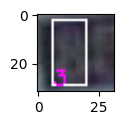

[(6, '4'), (16, '0')]


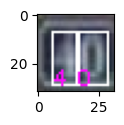

PERTURBED
% difference :  1.0
[(6, '4'), (16, '0')]


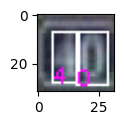

[(6, '2'), (14, '3')]


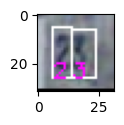

PERTURBED
% difference :  0.9801432291666666
[(6, '2'), (13, '3')]


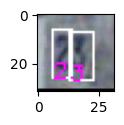

[(17, '2')]


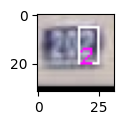

PERTURBED
% difference :  0.9658203125
[(3, '2'), (11, '0'), (17, '2')]


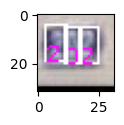

[(4, '1'), (14, '6')]


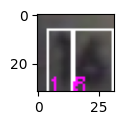

PERTURBED
% difference :  1.0
[(4, '1'), (14, '6')]


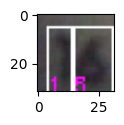

[(6, '9'), (15, '4')]


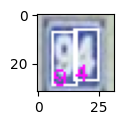

PERTURBED
% difference :  0.9996744791666666
[(6, '9'), (15, '4')]


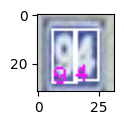

[(5, '1'), (16, '0')]


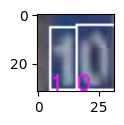

PERTURBED
% difference :  1.0
[(5, '1'), (16, '0')]


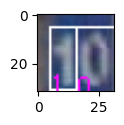

[(4, '7'), (5, '1'), (13, '6')]


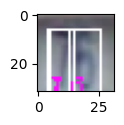

PERTURBED
% difference :  1.0
[(5, '1'), (5, '7'), (14, '6')]


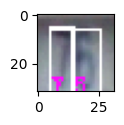

[(7, '6'), (17, '3')]


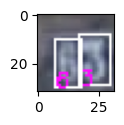

PERTURBED
% difference :  1.0
[(7, '6'), (17, '3')]


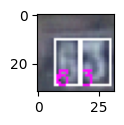

[(4, '3')]


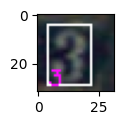

PERTURBED
% difference :  1.0
[(4, '3')]


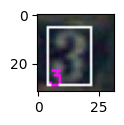

[(3, '3'), (13, '4')]


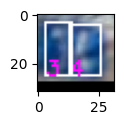

PERTURBED
% difference :  0.9410807291666666
[(4, '3'), (13, '4')]


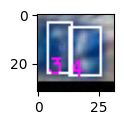

[(4, '6')]


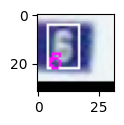

PERTURBED
% difference :  0.9388020833333334
[(4, '6')]


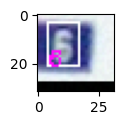

[(6, '4')]


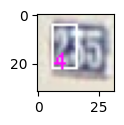

PERTURBED
% difference :  0.9996744791666666
[(6, '4')]


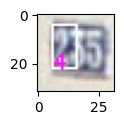

[(11, '2'), (21, '1'), (24, '1')]


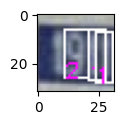

PERTURBED
% difference :  1.0
[(11, '2'), (21, '1'), (24, '1')]


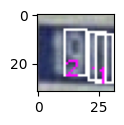

[(1, '0'), (14, '0'), (23, '1')]


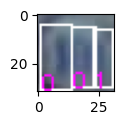

PERTURBED
% difference :  1.0
[(13, '0')]


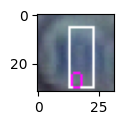

[(4, '2'), (14, '2')]


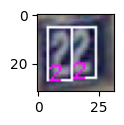

PERTURBED
% difference :  1.0
[(4, '2'), (14, '2')]


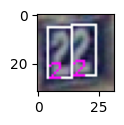

[(5, '1')]


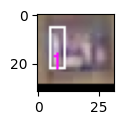

PERTURBED
% difference :  0.9547526041666666
[(5, '1')]


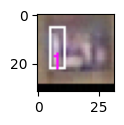

[(5, '3')]


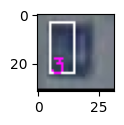

PERTURBED
% difference :  0.9856770833333334
[(5, '3')]


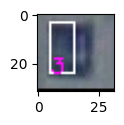

[(8, '2'), (15, '9')]


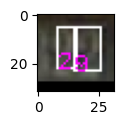

PERTURBED
% difference :  0.9856770833333334
[(0, '1'), (4, '9')]


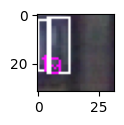

[(13, '0'), (22, '0')]


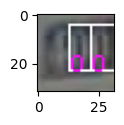

PERTURBED
% difference :  0.9934895833333334
[(8, '2')]


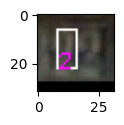

[(6, '4'), (12, '5')]


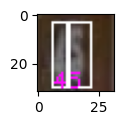

PERTURBED
% difference :  0.9931640625
[(13, '0'), (22, '0')]


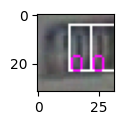

[(4, '2'), (15, '7'), (22, '3')]


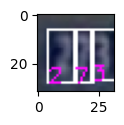

PERTURBED
% difference :  0.9889322916666666
[(5, '4')]


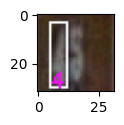

[(5, '2')]


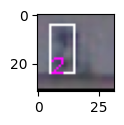

PERTURBED
% difference :  0.9977213541666666
[(4, '2'), (15, '7'), (22, '3')]


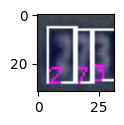

[(7, '5'), (9, '3')]


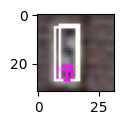

PERTURBED
% difference :  0.9964192708333334
[(4, '2')]


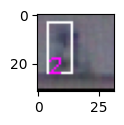

[(4, '1'), (16, '4')]


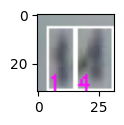

PERTURBED
% difference :  0.9973958333333334
[(8, '5'), (9, '3')]


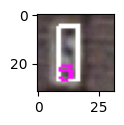

[(4, '1'), (11, '3'), (11, '5'), (21, '1')]


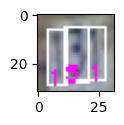

PERTURBED
% difference :  0.9892578125
[(4, '1'), (15, '4')]


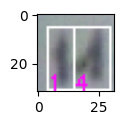

[(5, '9'), (16, '1')]


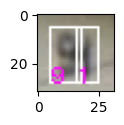

PERTURBED
% difference :  0.9886067708333334
[(4, '1'), (11, '3'), (20, '1')]


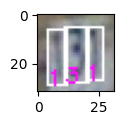

[(14, '7')]


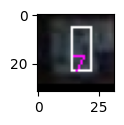

PERTURBED
% difference :  0.9996744791666666
[(5, '9')]


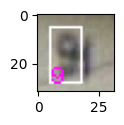

[(4, '2'), (16, '5')]


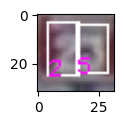

PERTURBED
% difference :  0.9993489583333334
[(15, '7')]


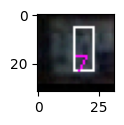

[(3, '2'), (18, '7')]


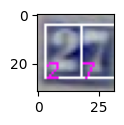

PERTURBED
% difference :  0.9957682291666666
[(4, '2'), (16, '5')]


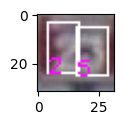

[(19, '7')]


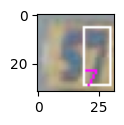

PERTURBED
% difference :  0.9866536458333334
[(3, '2'), (18, '7')]


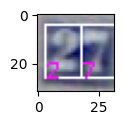

[(5, '2'), (14, '0'), (18, '0')]


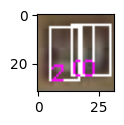

PERTURBED
% difference :  0.9977213541666666
[(8, '2'), (20, '7')]


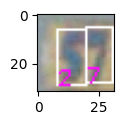

[(7, '1'), (12, '0'), (21, '5')]


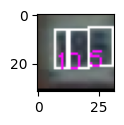

PERTURBED
% difference :  0.9889322916666666
[(4, '2'), (14, '0')]


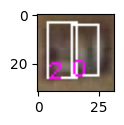

[(5, '2'), (8, '2'), (20, '1')]


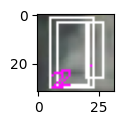

PERTURBED
% difference :  0.9938151041666666
[(7, '1'), (12, '0'), (21, '5')]


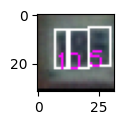

[(3, '3')]


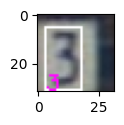

PERTURBED
% difference :  0.9954427083333334
[(8, '2'), (20, '1')]


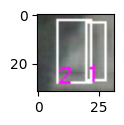

[(5, '1'), (11, '4')]


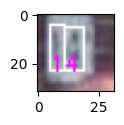

PERTURBED
% difference :  0.9931640625
[(3, '3')]


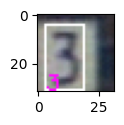

[(17, '9')]


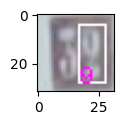

PERTURBED
% difference :  0.9918619791666666
[(5, '1'), (10, '4')]


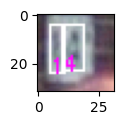

[(7, '6'), (14, '2')]


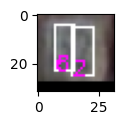

PERTURBED
% difference :  0.9983723958333334
[(8, '3'), (8, '8'), (17, '9')]


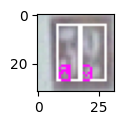

[(3, '2')]


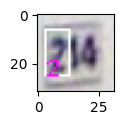

PERTURBED
% difference :  0.9983723958333334
[(15, '2')]


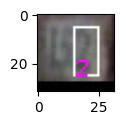

[(3, '1'), (12, '6')]


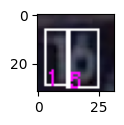

PERTURBED
% difference :  0.9986979166666666
[(3, '2')]


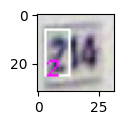

[(5, '1'), (6, '1'), (14, '6')]


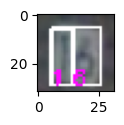

PERTURBED
% difference :  0.9993489583333334
[(3, '1'), (13, '6')]


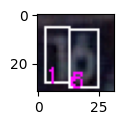

[(4, '6'), (15, '8')]


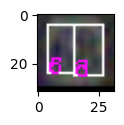

PERTURBED
% difference :  0.9947916666666666
[(5, '1'), (7, '1'), (14, '6')]


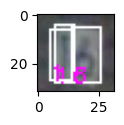

[(11, '3')]


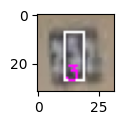

PERTURBED
% difference :  1.0
[(11, '3')]


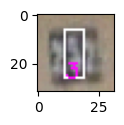

[(3, '5')]


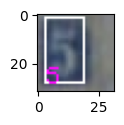

PERTURBED
% difference :  1.0
[(2, '5')]


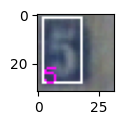

[(4, '9'), (5, '8')]


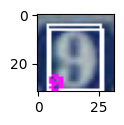

PERTURBED
% difference :  1.0
[(4, '8'), (4, '9')]


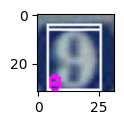

[(5, '2'), (13, '3')]


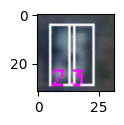

PERTURBED
% difference :  1.0
[(5, '2'), (13, '3')]


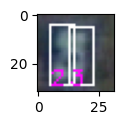

[(4, '1'), (11, '2')]


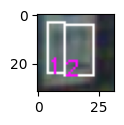

PERTURBED
% difference :  1.0
[(11, '2')]


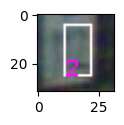

[(2, '9'), (12, '1')]


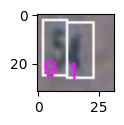

PERTURBED
% difference :  0.9957682291666666
[(6, '5'), (13, '5'), (22, '7')]


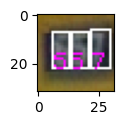

[(14, '5'), (21, '7')]


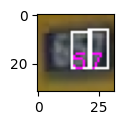

PERTURBED
% difference :  0.9967447916666666
[(3, '9'), (20, '5')]


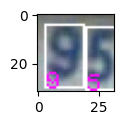

[(3, '9'), (18, '5')]


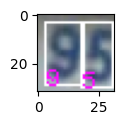

PERTURBED
% difference :  0.9928385416666666
[(10, '9')]


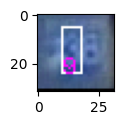

[(9, '9')]


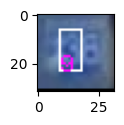

PERTURBED
% difference :  0.9931640625
[(2, '1'), (4, '1'), (11, '7')]


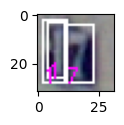

[(2, '1'), (4, '1'), (12, '7')]


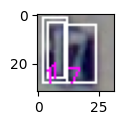

PERTURBED
% difference :  0.9934895833333334
[(5, '1')]


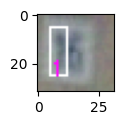

[(5, '1')]


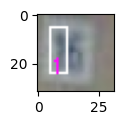

PERTURBED
% difference :  0.9934895833333334
[(6, '2'), (14, '0')]


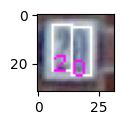

[(6, '2'), (14, '0')]


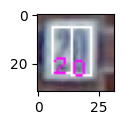

PERTURBED
% difference :  0.9957682291666666
[(3, '4'), (16, '9')]


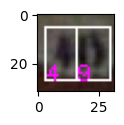

[(4, '4'), (16, '9')]


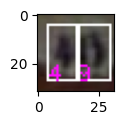

PERTURBED
% difference :  0.9957682291666666
[(6, '0')]


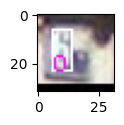

[(6, '0')]


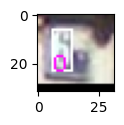

PERTURBED
% difference :  0.9944661458333334
[(9, '7')]


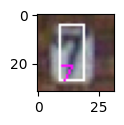

[(8, '7')]


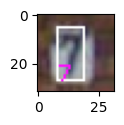

PERTURBED
% difference :  0.9967447916666666
[(4, '3'), (15, '5')]


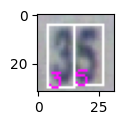

[(4, '3'), (14, '5')]


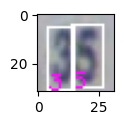

PERTURBED
% difference :  0.9983723958333334
[(1, '1'), (3, '1'), (4, '1'), (12, '6')]


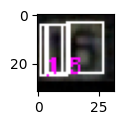

[(1, '1'), (3, '1'), (12, '6')]


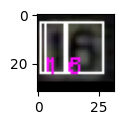

PERTURBED
% difference :  0.9934895833333334
[(7, '2')]


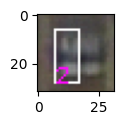

[(6, '2')]


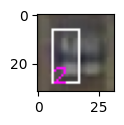

PERTURBED
% difference :  0.9931640625
[(6, '5')]


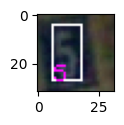

[(6, '5')]


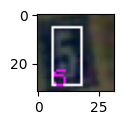

PERTURBED
% difference :  0.9993489583333334
[(6, '9'), (17, '6')]


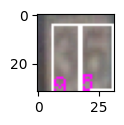

[(17, '6')]


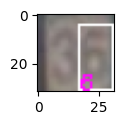

PERTURBED
% difference :  0.9840494791666666
[(4, '2'), (13, '2')]


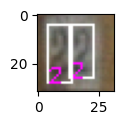

[(4, '2'), (14, '2')]


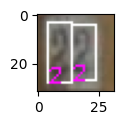

PERTURBED
% difference :  0.9973958333333334
[(6, '4'), (15, '4')]


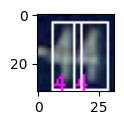

[(6, '4'), (15, '4')]


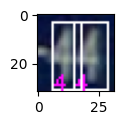

PERTURBED
% difference :  0.9915364583333334
[(5, '3'), (16, '9')]


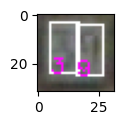

[(4, '3'), (15, '9')]


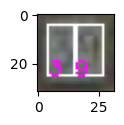

PERTURBED
% difference :  0.9908854166666666
[(6, '8'), (15, '4')]


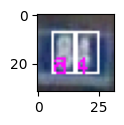

[(6, '8'), (15, '4')]


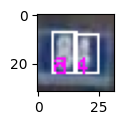

PERTURBED
% difference :  0.9912109375
[(6, '2'), (16, '3'), (16, '7')]


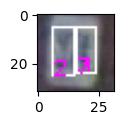

[(6, '2'), (16, '3')]


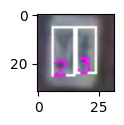

PERTURBED
% difference :  0.9928385416666666
[(3, '4')]


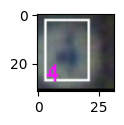

[(3, '4')]


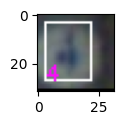

PERTURBED
% difference :  0.994140625
[(5, '2'), (14, '7')]


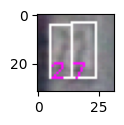

[(5, '2'), (14, '2')]


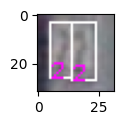

PERTURBED
% difference :  0.9925130208333334
[(5, '1'), (16, '8')]


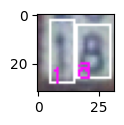

[(15, '9')]


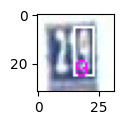

PERTURBED
% difference :  0.9990234375
[(1, '2'), (14, '1'), (19, '1')]


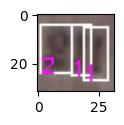

[(5, '1'), (16, '8')]


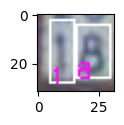

PERTURBED
% difference :  0.9850260416666666
[(6, '1'), (16, '7')]


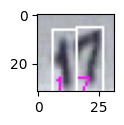

[(1, '2'), (2, '9'), (14, '1'), (19, '1')]


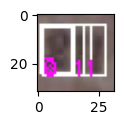

PERTURBED
% difference :  0.9925130208333334
[(5, '1')]


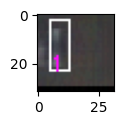

[(4, '1'), (16, '7')]


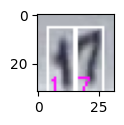

PERTURBED
% difference :  0.9983723958333334
[(7, '2'), (15, '1'), (21, '0'), (21, '6')]


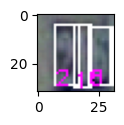

[(4, '1')]


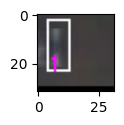

PERTURBED
% difference :  0.9970703125
[(3, '1'), (5, '1'), (12, '1')]


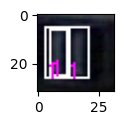

[(7, '2'), (15, '1'), (21, '0'), (21, '6')]


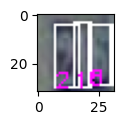

PERTURBED
% difference :  0.9837239583333334
[(4, '3')]


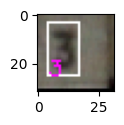

[(3, '1'), (5, '1'), (12, '1')]


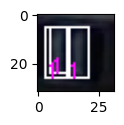

PERTURBED
% difference :  0.9993489583333334
[(5, '5')]


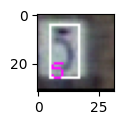

[(4, '3')]


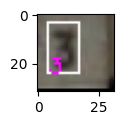

PERTURBED
% difference :  0.9951171875
[(6, '7')]


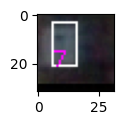

[(5, '5')]


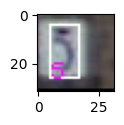

PERTURBED
% difference :  0.9954427083333334
[(17, '8')]


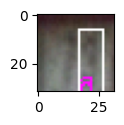

[(5, '7')]


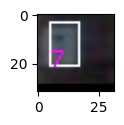

PERTURBED
% difference :  0.9986979166666666
[(5, '4')]


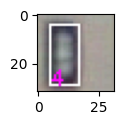

[(6, '7')]


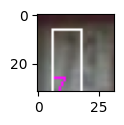

PERTURBED
% difference :  0.9915364583333334
[(4, '7'), (15, '7')]


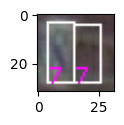

[(3, '3')]


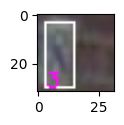

PERTURBED
% difference :  0.9899088541666666
[(5, '3'), (13, '9')]


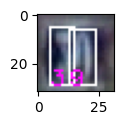

[(5, '3'), (13, '9')]


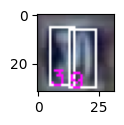

PERTURBED
% difference :  0.9957682291666666
[(6, '1')]


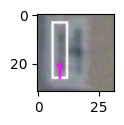

[(6, '1')]


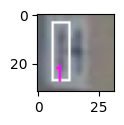

PERTURBED
% difference :  0.9993489583333334
[(6, '5')]


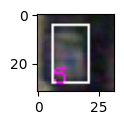

[(7, '5')]


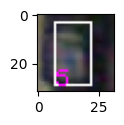

PERTURBED
% difference :  0.9993489583333334
[(5, '3')]


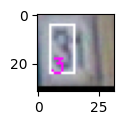

[(5, '3')]


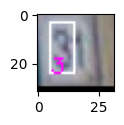

PERTURBED
% difference :  0.9664713541666666
[(4, '2'), (13, '4')]


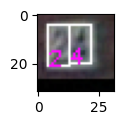

[(4, '2'), (13, '4')]


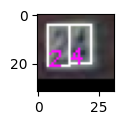

PERTURBED
% difference :  0.9869791666666666
[(5, '2'), (12, '4')]


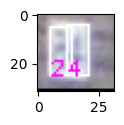

[(4, '7'), (19, '2')]


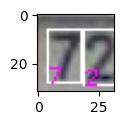

PERTURBED
% difference :  1.0
[(4, '7'), (19, '2')]


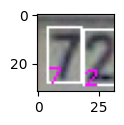

[(5, '7'), (14, '8')]


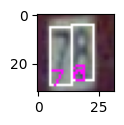

PERTURBED
% difference :  1.0
[(5, '7'), (14, '8')]


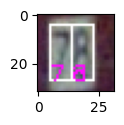

[(5, '4')]


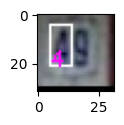

PERTURBED
% difference :  0.97265625
[(5, '4'), (13, '9')]


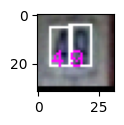

[(4, '9'), (15, '1')]


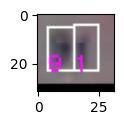

PERTURBED
% difference :  0.9563802083333334
[(14, '1')]


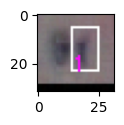

[(7, '1'), (19, '3')]


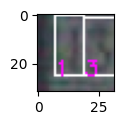

PERTURBED
% difference :  1.0
[(7, '1'), (20, '3')]


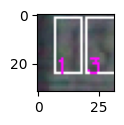

[(5, '2'), (18, '1')]


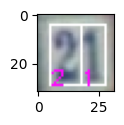

PERTURBED
% difference :  1.0
[(5, '2'), (17, '1')]


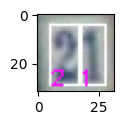

[(4, '3'), (14, '4'), (24, '1')]


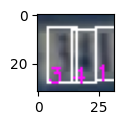

PERTURBED
% difference :  1.0
[(4, '3'), (15, '4'), (24, '1')]


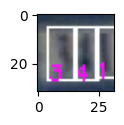

[(26, '1')]


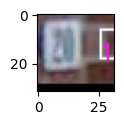

PERTURBED
% difference :  0.9580078125
[(26, '1')]


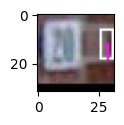

[(4, '6')]


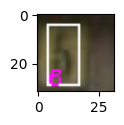

PERTURBED
% difference :  1.0
[(3, '6')]


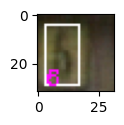

[(3, '2')]


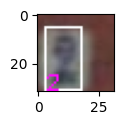

PERTURBED
% difference :  1.0
[(4, '2')]


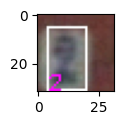

[(5, '4'), (20, '8')]


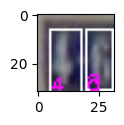

PERTURBED
% difference :  1.0
[(5, '4'), (20, '6'), (20, '8')]


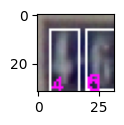

[(10, '1'), (14, '7'), (23, '2')]


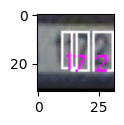

PERTURBED
% difference :  0.9850260416666666
[(8, '1'), (9, '1'), (14, '7'), (23, '2')]


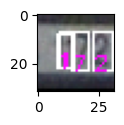

[(6, '2'), (16, '0')]


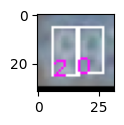

PERTURBED
% difference :  0.9619140625
[(8, '2')]


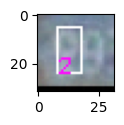

[(4, '2'), (15, '2'), (15, '7')]


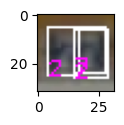

PERTURBED
% difference :  1.0
[(4, '7'), (15, '2'), (16, '7')]


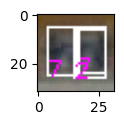

[(4, '5')]


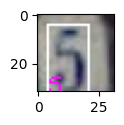

PERTURBED
% difference :  1.0
[(4, '5')]


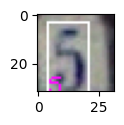

[(5, '6'), (15, '9')]


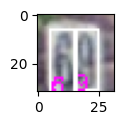

PERTURBED
% difference :  1.0
[(5, '6'), (15, '9')]


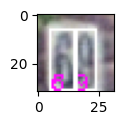

[(7, '9'), (14, '1')]


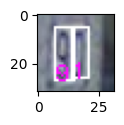

PERTURBED
% difference :  1.0
[(7, '9')]


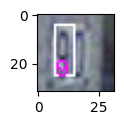

[(5, '5'), (13, '7')]


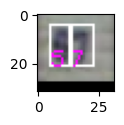

PERTURBED
% difference :  0.9365234375
[(5, '5'), (14, '7')]


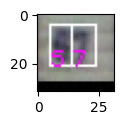

[(5, '3'), (6, '5'), (15, '1')]


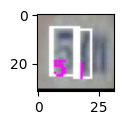

PERTURBED
% difference :  0.9798177083333334
[(5, '5')]


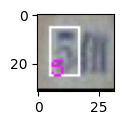

[(4, '3'), (15, '0')]


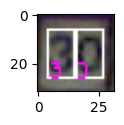

PERTURBED
% difference :  1.0
[(3, '5'), (15, '0')]


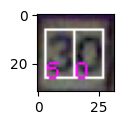

[(5, '3'), (13, '3')]


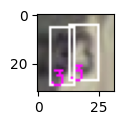

PERTURBED
% difference :  1.0
[(0, '2'), (6, '3'), (13, '3')]


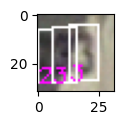

[(5, '2'), (18, '1')]


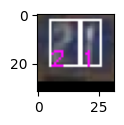

PERTURBED
% difference :  0.9345703125
[(5, '2'), (18, '1')]


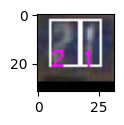

[(4, '9'), (18, '7')]


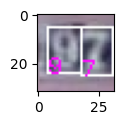

PERTURBED
% difference :  1.0
[(4, '9'), (18, '7')]


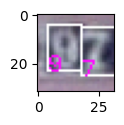

[(4, '7'), (15, '5')]


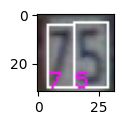

PERTURBED
% difference :  1.0
[(4, '7'), (15, '5')]


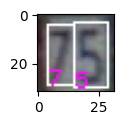

[(5, '8'), (17, '6')]


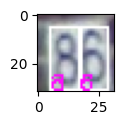

PERTURBED
% difference :  1.0
[(5, '8'), (17, '6')]


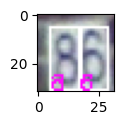

[(5, '3'), (6, '5')]


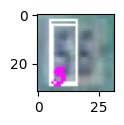

PERTURBED
% difference :  1.0
[(6, '5'), (15, '3')]


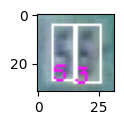

[(6, '6')]


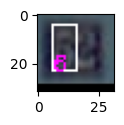

PERTURBED
% difference :  0.9612630208333334
[(6, '6'), (15, '2')]


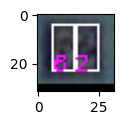

[(3, '4')]


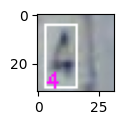

PERTURBED
% difference :  1.0
[(3, '4')]


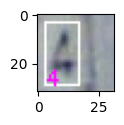

[(5, '8'), (15, '1')]


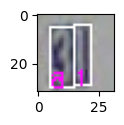

PERTURBED
% difference :  1.0
[(15, '1')]


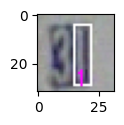

[(6, '1'), (18, '2')]


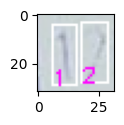

PERTURBED
% difference :  1.0
[(6, '1'), (17, '2')]


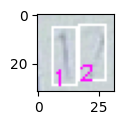

[(8, '1'), (22, '3')]


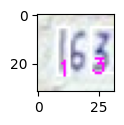

PERTURBED
% difference :  0.9892578125
[(7, '1'), (22, '3')]


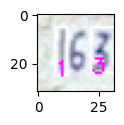

[(0, '5'), (6, '7')]


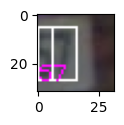

PERTURBED
% difference :  1.0
[(0, '5'), (6, '7')]


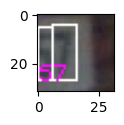

[(8, '1'), (11, '7'), (20, '2'), (20, '9')]


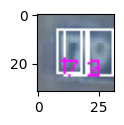

PERTURBED
% difference :  1.0
[(8, '1'), (12, '7'), (20, '2'), (20, '9')]


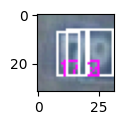

[(11, '0')]


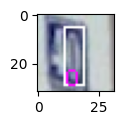

PERTURBED
% difference :  0.9996744791666666
[(11, '0')]


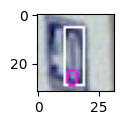

[(2, '1'), (4, '1'), (11, '1'), (20, '0')]


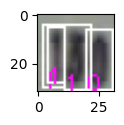

PERTURBED
% difference :  1.0
[(2, '1'), (4, '1'), (20, '0')]


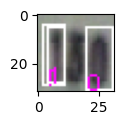

[(4, '4'), (16, '1'), (21, '1'), (22, '1')]


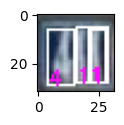

PERTURBED
% difference :  1.0
[(4, '4'), (16, '1'), (21, '1'), (22, '1')]


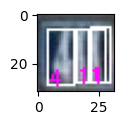

[(6, '2'), (21, '5')]


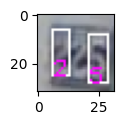

PERTURBED
% difference :  1.0
[(6, '2'), (21, '5')]


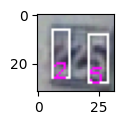

[(19, '0')]


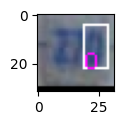

PERTURBED
% difference :  0.96484375
[(18, '0')]


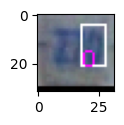

[(5, '6'), (18, '8')]


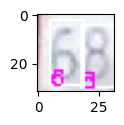

PERTURBED
% difference :  0.9990234375
[(5, '6'), (18, '8')]


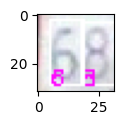

[(7, '8'), (17, '9')]


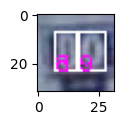

PERTURBED
% difference :  1.0
[(8, '8'), (17, '9')]


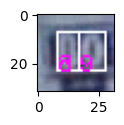

[(6, '3')]


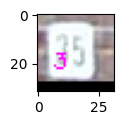

PERTURBED
% difference :  0.9475911458333334
[(11, '0')]


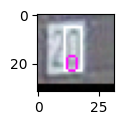

[(11, '0')]


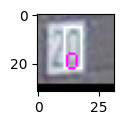

PERTURBED
% difference :  0.9944661458333334
[(4, '1'), (6, '1')]


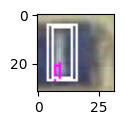

[(4, '1'), (6, '1')]


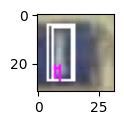

PERTURBED
% difference :  0.9895833333333334
[(6, '1'), (12, '2')]


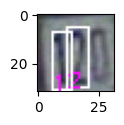

[(6, '1'), (12, '2')]


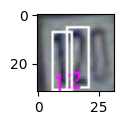

PERTURBED
% difference :  0.9912109375
[(3, '3')]


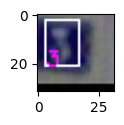

[(3, '3')]


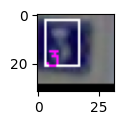

PERTURBED
% difference :  0.9986979166666666
[(5, '1')]


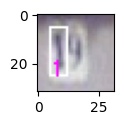

[(5, '1'), (10, '0')]


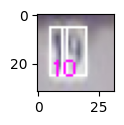

PERTURBED
% difference :  1.0
[(6, '1'), (13, '5')]


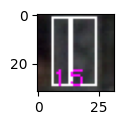

[(7, '1'), (13, '5')]


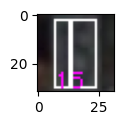

PERTURBED
% difference :  0.9873046875
[(6, '9')]


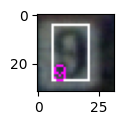

[(5, '9')]


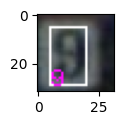

PERTURBED
% difference :  0.99609375
[(4, '3'), (14, '8')]


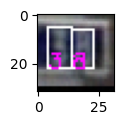

[(4, '3'), (14, '8')]


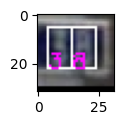

PERTURBED
% difference :  0.9768880208333334
[(11, '2')]


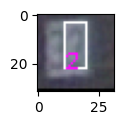

[(6, '3'), (13, '3')]


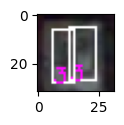

PERTURBED
% difference :  1.0
[(5, '3'), (14, '3')]


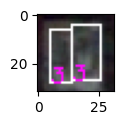

[(9, '9')]


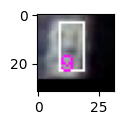

PERTURBED
% difference :  0.9248046875
[(8, '9')]


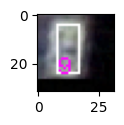

[(6, '9'), (15, '6')]


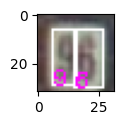

PERTURBED
% difference :  1.0
[(6, '9'), (15, '6')]


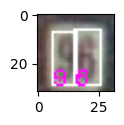

[(5, '3'), (5, '8'), (16, '5')]


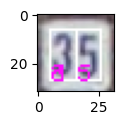

PERTURBED
% difference :  1.0
[(5, '3'), (16, '5')]


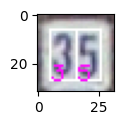

[(12, '5'), (13, '3')]


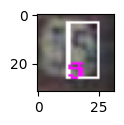

PERTURBED
% difference :  1.0
[(12, '3'), (13, '5')]


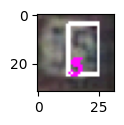

[(4, '2'), (17, '2')]


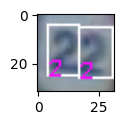

PERTURBED
% difference :  1.0
[(4, '2'), (17, '2')]


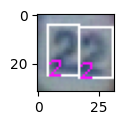

[(4, '6')]


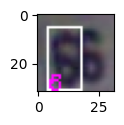

PERTURBED
% difference :  0.9944661458333334
[(1, '5'), (19, '8')]


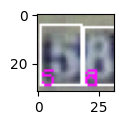

[(1, '5'), (19, '8')]


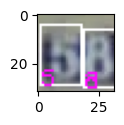

PERTURBED
% difference :  0.9918619791666666
[(19, '8')]


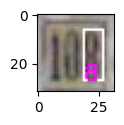

[(4, '1'), (19, '8')]


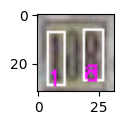

PERTURBED
% difference :  0.9990234375
[(3, '9')]


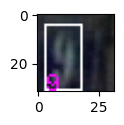

[(3, '9'), (4, '8')]


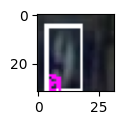

PERTURBED
% difference :  0.9993489583333334
[(4, '2'), (12, '3')]


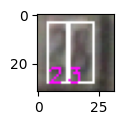

[(4, '2'), (12, '3')]


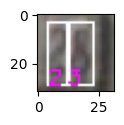

PERTURBED
% difference :  0.9928385416666666
[(3, '2'), (16, '3')]


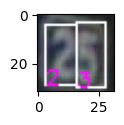

[(3, '2'), (16, '3')]


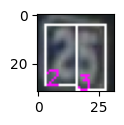

PERTURBED
% difference :  0.9944661458333334
[(3, '7')]


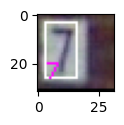

[(4, '7')]


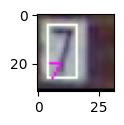

PERTURBED
% difference :  0.9873046875
[(13, '3')]


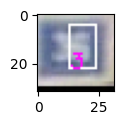

[(13, '3')]


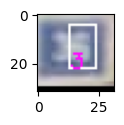

PERTURBED
% difference :  0.9944661458333334
[(3, '9')]


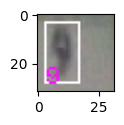

[(3, '9')]


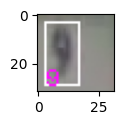

PERTURBED
% difference :  0.9970703125
[(6, '7'), (7, '7')]


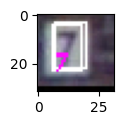

[(6, '7'), (8, '7')]


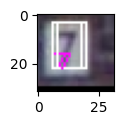

PERTURBED
% difference :  0.9921875
[(6, '4')]


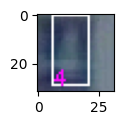

[(0, '2'), (4, '4')]


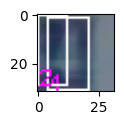

PERTURBED
% difference :  0.9934895833333334
[(3, '4')]


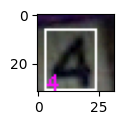

[(4, '4')]


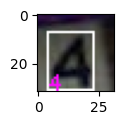

PERTURBED
% difference :  0.9892578125
[(7, '5')]


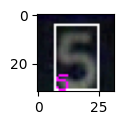

[(7, '5')]


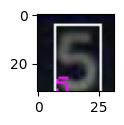

PERTURBED
% difference :  0.9964192708333334
[(18, '9')]


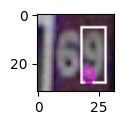

[(8, '6'), (9, '8'), (19, '9')]


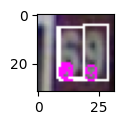

PERTURBED
% difference :  0.9964192708333334
[(21, '1')]


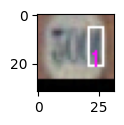

[(6, '1'), (9, '0')]


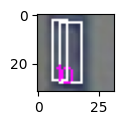

PERTURBED
% difference :  0.9983723958333334
[(5, '6')]


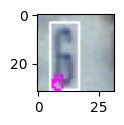

[(21, '1')]


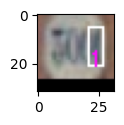

PERTURBED
% difference :  0.9895833333333334
[(4, '4'), (17, '1')]


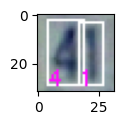

[(5, '6')]


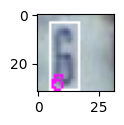

PERTURBED
% difference :  0.9847005208333334
[(3, '1'), (10, '4'), (20, '1')]


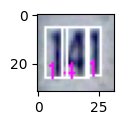

[(6, '7')]


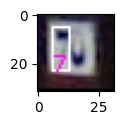

PERTURBED
% difference :  0.9964192708333334
[(19, '1')]


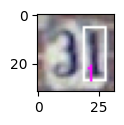

[(4, '4'), (17, '1')]


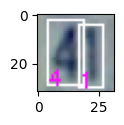

PERTURBED
% difference :  0.9970703125
[(18, '7')]


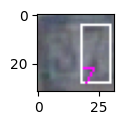

[(3, '1'), (10, '4'), (19, '1')]


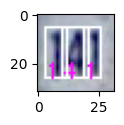

PERTURBED
% difference :  0.9967447916666666
[(5, '2'), (15, '4')]


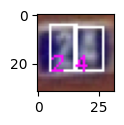

[(5, '3'), (19, '1')]


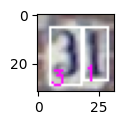

PERTURBED
% difference :  0.9990234375
[(7, '2'), (20, '5')]


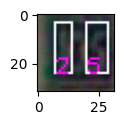

[(18, '7')]


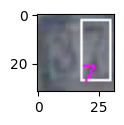

PERTURBED
% difference :  0.9957682291666666
[(4, '1'), (13, '3'), (13, '8')]


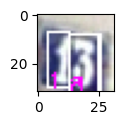

[(5, '2'), (15, '4')]


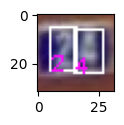

PERTURBED
% difference :  0.9921875
[(5, '8')]


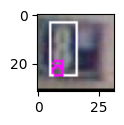

[(7, '1'), (8, '2'), (8, '2'), (20, '5')]


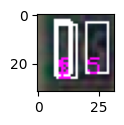

PERTURBED
% difference :  0.9934895833333334
[(12, '4')]


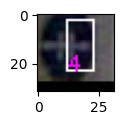

[(4, '1'), (13, '3'), (13, '8')]


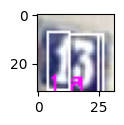

PERTURBED
% difference :  0.9977213541666666
[(6, '2'), (14, '1')]


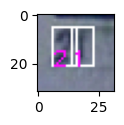

[(5, '8')]


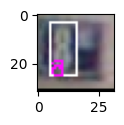

PERTURBED
% difference :  0.9912109375
[(5, '1')]


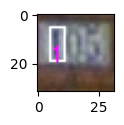

[(7, '1'), (13, '4')]


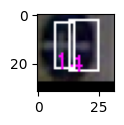

PERTURBED
% difference :  0.9964192708333334
[(14, '4')]


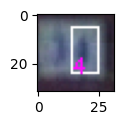

[(5, '2'), (14, '1')]


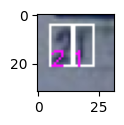

PERTURBED
% difference :  0.9925130208333334
[(4, '1'), (11, '5')]


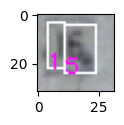

[(3, '1'), (5, '1')]


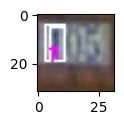

PERTURBED
% difference :  0.9957682291666666
[(5, '1'), (12, '5')]


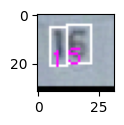

[(3, '3'), (14, '4')]


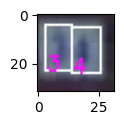

PERTURBED
% difference :  0.9895833333333334
[(6, '5'), (15, '7')]


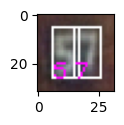

[(4, '1'), (6, '1'), (11, '5')]


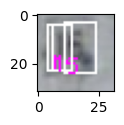

PERTURBED
% difference :  1.0
[(4, '5'), (18, '8')]


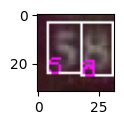

[(6, '1'), (12, '5')]


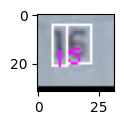

PERTURBED
% difference :  0.9993489583333334
[(4, '1'), (13, '5')]


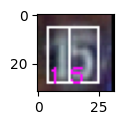

[(6, '5'), (15, '7')]


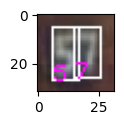

PERTURBED
% difference :  0.9973958333333334
[(8, '3'), (16, '1')]


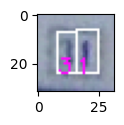

[(4, '5'), (18, '8')]


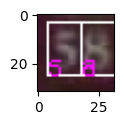

PERTURBED
% difference :  0.9990234375
[(4, '3'), (14, '9')]


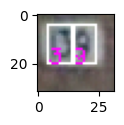

[(5, '1'), (13, '5')]


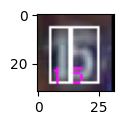

PERTURBED
% difference :  0.9990234375
[(2, '4'), (17, '1')]


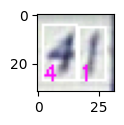

[(8, '3'), (16, '1')]


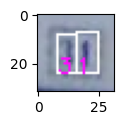

PERTURBED
% difference :  0.994140625
[(7, '8'), (17, '4')]


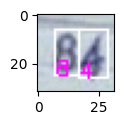

[(5, '3'), (13, '9')]


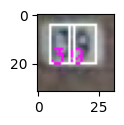

PERTURBED
% difference :  0.9967447916666666
[(5, '2'), (17, '7')]


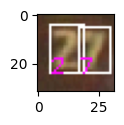

[(2, '4'), (16, '1')]


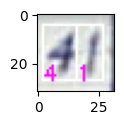

PERTURBED
% difference :  0.9986979166666666
[(3, '2'), (15, '2')]


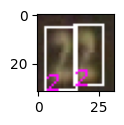

[(7, '8'), (17, '4')]


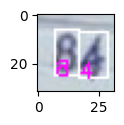

PERTURBED
% difference :  1.0
[(5, '2'), (18, '1')]


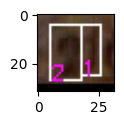

[(4, '2'), (17, '7')]


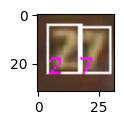

PERTURBED
% difference :  0.9986979166666666
[(3, '2'), (15, '0')]


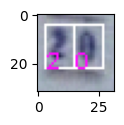

[(3, '2'), (15, '2')]


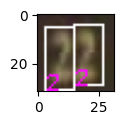

PERTURBED
% difference :  0.98828125
[(7, '3'), (20, '4')]


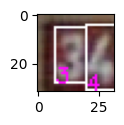

[(6, '2'), (18, '1')]


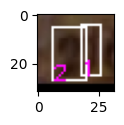

PERTURBED
% difference :  0.9957682291666666
[(5, '3')]


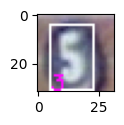

[(3, '2'), (14, '0')]


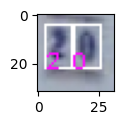

PERTURBED
% difference :  0.9820963541666666
[(4, '2'), (14, '6')]


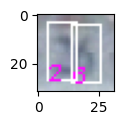

[(8, '3'), (20, '4')]


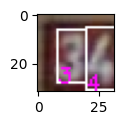

PERTURBED
% difference :  0.99609375
[(2, '3'), (12, '7')]


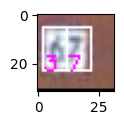

[(5, '3')]


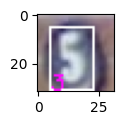

PERTURBED
% difference :  0.9970703125
[(4, '4'), (16, '5')]


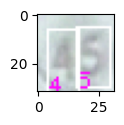

[(4, '2'), (13, '6')]


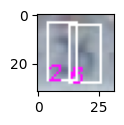

PERTURBED
% difference :  0.9892578125
[(5, '1'), (11, '4')]


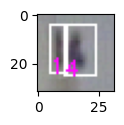

[(2, '3'), (12, '7')]


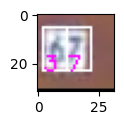

PERTURBED
% difference :  0.9899088541666666
[(5, '5')]


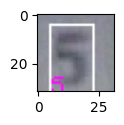

[(4, '4'), (16, '5')]


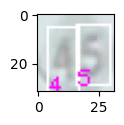

PERTURBED
% difference :  1.0
[(7, '7'), (16, '0')]


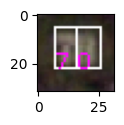

[(5, '1'), (11, '4')]


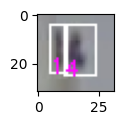

PERTURBED
% difference :  0.9781901041666666
[(6, '6')]


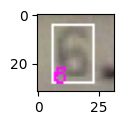

[(5, '5')]


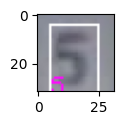

PERTURBED
% difference :  0.9876302083333334
[(9, '1'), (16, '1'), (20, '3')]


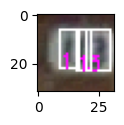

[(7, '7'), (15, '0')]


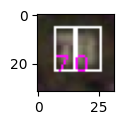

PERTURBED
% difference :  0.9996744791666666
[(4, '5'), (14, '3')]


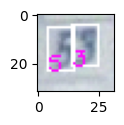

[(6, '6')]


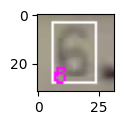

PERTURBED
% difference :  0.9934895833333334
[(6, '8'), (17, '5')]


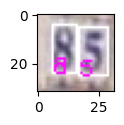

[(9, '1'), (16, '1'), (19, '3')]


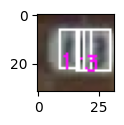

PERTURBED
% difference :  0.9970703125
[(7, '2')]


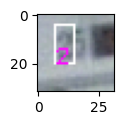

[(6, '5'), (14, '3')]


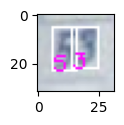

PERTURBED
% difference :  0.998046875
[(2, '1'), (5, '1'), (12, '5')]


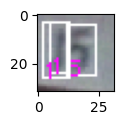

[(5, '8'), (17, '5')]


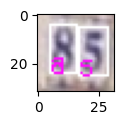

PERTURBED
% difference :  0.9928385416666666
[(3, '4'), (15, '7')]


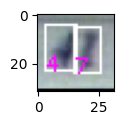

[(6, '2')]


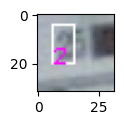

PERTURBED
% difference :  0.9947916666666666
[(5, '2'), (12, '0')]


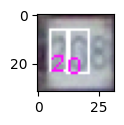

[(2, '1'), (4, '1'), (12, '5')]


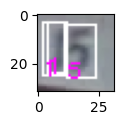

PERTURBED
% difference :  0.9973958333333334
[(4, '2')]


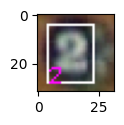

[(4, '4'), (15, '1')]


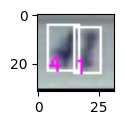

PERTURBED
% difference :  0.9970703125
[(5, '3'), (13, '0')]


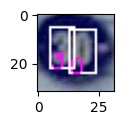

[(5, '2'), (12, '0')]


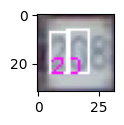

PERTURBED
% difference :  0.9967447916666666
[(5, '4'), (14, '7')]


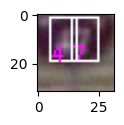

[(4, '2')]


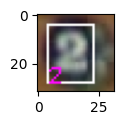

PERTURBED
% difference :  0.9928385416666666
[(0, '4'), (16, '7')]


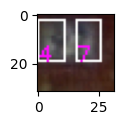

[(5, '3'), (13, '0')]


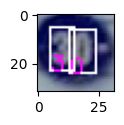

PERTURBED
% difference :  0.9986979166666666
[(3, '9')]


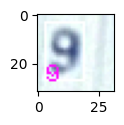

[(5, '4'), (14, '7')]


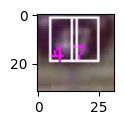

PERTURBED
% difference :  0.9928385416666666
[(0, '5')]


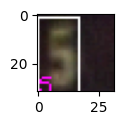

[(5, '2'), (15, '7')]


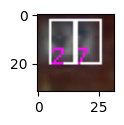

PERTURBED
% difference :  0.9996744791666666
[(6, '2')]


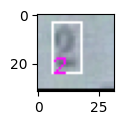

[(2, '9')]


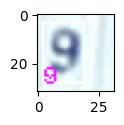

PERTURBED
% difference :  0.9990234375
[(5, '3'), (14, '1')]


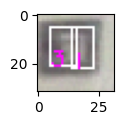

[(0, '5')]


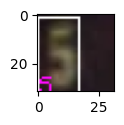

PERTURBED
% difference :  0.9869791666666666
[(6, '2'), (15, '4'), (19, '4')]


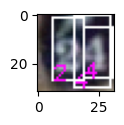

[(6, '2')]


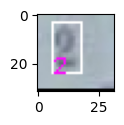

PERTURBED
% difference :  0.9964192708333334
[(6, '1'), (14, '2')]


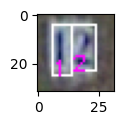

[(5, '3'), (14, '1')]


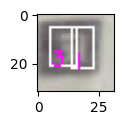

PERTURBED
% difference :  0.9996744791666666
[(3, '9')]


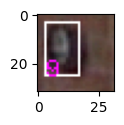

[(6, '2'), (15, '4'), (19, '4')]


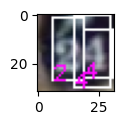

PERTURBED
% difference :  0.9993489583333334
[(9, '7')]


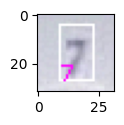

[(7, '1'), (14, '2')]


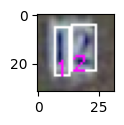

PERTURBED
% difference :  0.9951171875
[(10, '2')]


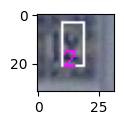

[(2, '9')]


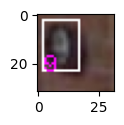

PERTURBED
% difference :  1.0
[(5, '4'), (13, '0')]


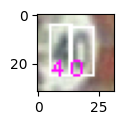

[(9, '7')]


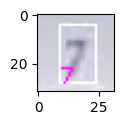

PERTURBED
% difference :  1.0
[(11, '6')]


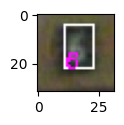

[(10, '2')]


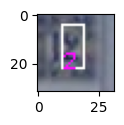

PERTURBED
% difference :  0.9996744791666666
[(5, '4')]


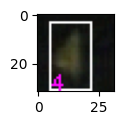

[(5, '4'), (13, '0')]


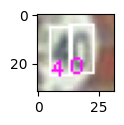

PERTURBED
% difference :  0.9986979166666666
[(3, '2'), (13, '5')]


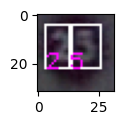

[(10, '6')]


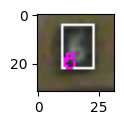

PERTURBED
% difference :  0.984375
[(4, '4'), (16, '3')]


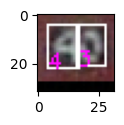

[(6, '4')]


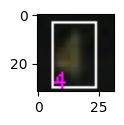

PERTURBED
% difference :  0.9990234375
[(3, '7'), (13, '1')]


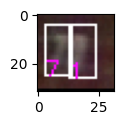

[(3, '2'), (13, '5')]


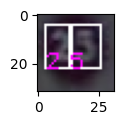

PERTURBED
% difference :  0.99609375
[(1, '6'), (4, '6'), (12, '5')]


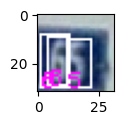

[(12, '1')]


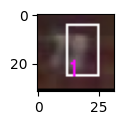

PERTURBED
% difference :  0.9951171875
[(3, '8'), (13, '5')]


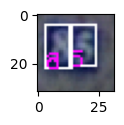

[(2, '6'), (4, '6'), (12, '5')]


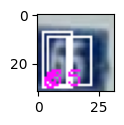

PERTURBED
% difference :  0.9957682291666666
[(5, '2'), (18, '0')]


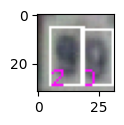

[(3, '8'), (13, '5')]


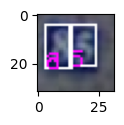

PERTURBED
% difference :  0.9996744791666666
[(5, '3')]


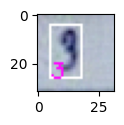

[(6, '9'), (18, '0')]


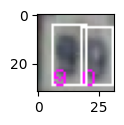

PERTURBED
% difference :  0.9944661458333334
[(4, '2')]


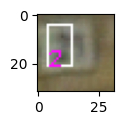

[(5, '3')]


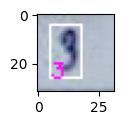

PERTURBED
% difference :  0.9993489583333334
[(12, '2')]


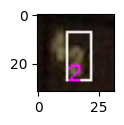

[(4, '2')]


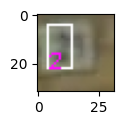

PERTURBED
% difference :  0.9899088541666666
[(4, '6')]


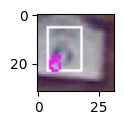

[(4, '6')]


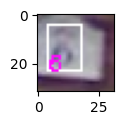

PERTURBED
% difference :  0.9934895833333334
[(4, '3')]


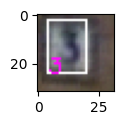

[(4, '3')]


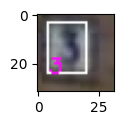

PERTURBED
% difference :  0.998046875
[(4, '3'), (5, '8')]


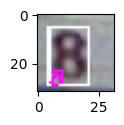

[(4, '3'), (5, '8')]


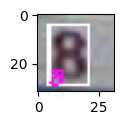

PERTURBED
% difference :  0.9947916666666666
[(9, '3'), (12, '3'), (20, '2')]


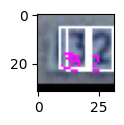

[(4, '1'), (12, '3'), (20, '2')]


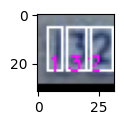

PERTURBED
% difference :  0.9938151041666666
[(4, '2'), (19, '0')]


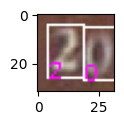

[(5, '2'), (19, '0')]


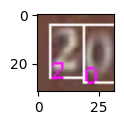

PERTURBED
% difference :  0.9990234375
[(4, '5'), (15, '1')]


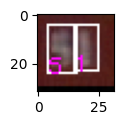

[(3, '5'), (14, '1')]


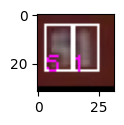

PERTURBED
% difference :  0.9716796875
[(5, '4'), (14, '1')]


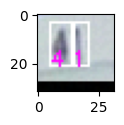

[(5, '4'), (14, '1')]


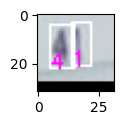

PERTURBED
% difference :  0.9895833333333334
[(6, '7')]


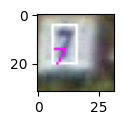

[(6, '7')]


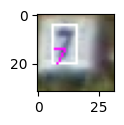

PERTURBED
% difference :  0.9921875
[(6, '4'), (14, '0')]


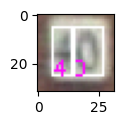

[(6, '4'), (14, '0')]


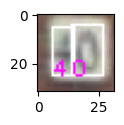

PERTURBED
% difference :  0.9918619791666666
[(3, '1'), (12, '4')]


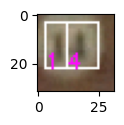

[(3, '1'), (12, '4')]


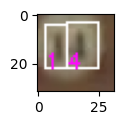

PERTURBED
% difference :  0.9921875
[(13, '6')]


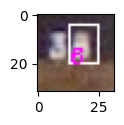

[(13, '6')]


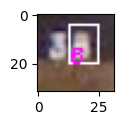

PERTURBED
% difference :  0.9954427083333334
[(10, '4')]


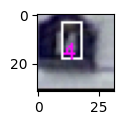

[(10, '4')]


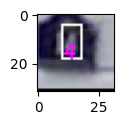

PERTURBED
% difference :  0.9954427083333334
[(4, '2'), (16, '9')]


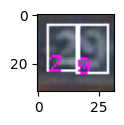

[(4, '2'), (16, '9')]


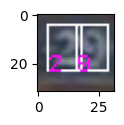

PERTURBED
% difference :  0.9967447916666666
[(4, '6'), (16, '6')]


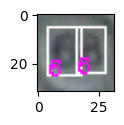

[(4, '6'), (16, '6')]


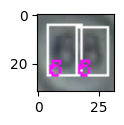

PERTURBED
% difference :  0.998046875
[(4, '2'), (14, '1')]


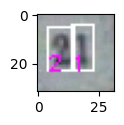

[(4, '2'), (14, '1')]


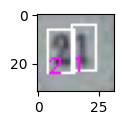

PERTURBED
% difference :  0.9833984375
[(6, '9'), (16, '6')]


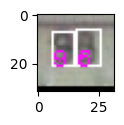

[(6, '9'), (16, '6')]


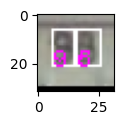

PERTURBED
% difference :  0.9827473958333334
[(4, '5'), (14, '2')]


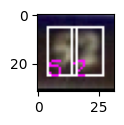

[(4, '5'), (15, '2')]


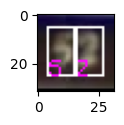

PERTURBED
% difference :  0.9886067708333334
[(5, '3'), (19, '3')]


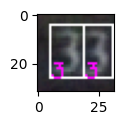

[(3, '3'), (18, '3')]


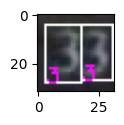

PERTURBED
% difference :  0.9830729166666666
[(5, '3'), (15, '1'), (21, '7')]


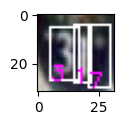

[(5, '3'), (15, '1'), (21, '7')]


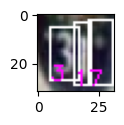

PERTURBED
% difference :  0.9934895833333334
[(4, '7'), (14, '2')]


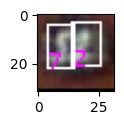

[(2, '3'), (4, '7'), (14, '2')]


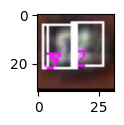

PERTURBED
% difference :  0.9977213541666666
[(6, '6'), (15, '7')]


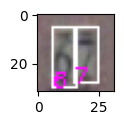

[(6, '6'), (15, '7')]


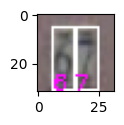

PERTURBED
% difference :  0.9977213541666666
[(4, '1'), (12, '4')]


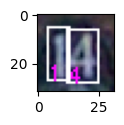

[(4, '1'), (12, '4')]


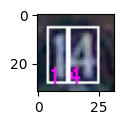

PERTURBED
% difference :  0.9905598958333334
[(5, '7'), (16, '8')]


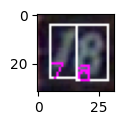

[(6, '7'), (16, '8')]


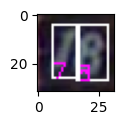

PERTURBED
% difference :  0.9993489583333334
[(16, '3')]


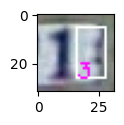

[(16, '3')]


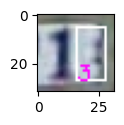

PERTURBED
% difference :  0.9921875
[(8, '1'), (14, '8')]


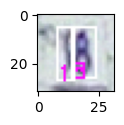

[(8, '1'), (14, '8')]


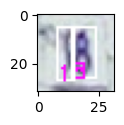

PERTURBED
% difference :  0.9983723958333334
[(8, '1'), (16, '2')]


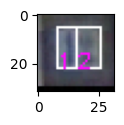

[(7, '1'), (16, '2')]


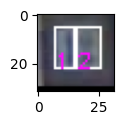

PERTURBED
% difference :  0.9947916666666666
[(6, '7')]


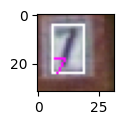

[(6, '7')]


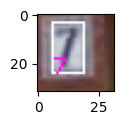

PERTURBED
% difference :  0.9986979166666666
[(4, '2')]


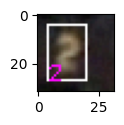

[(4, '2'), (4, '5')]


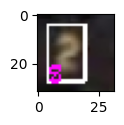

PERTURBED
% difference :  0.9990234375
[(5, '9'), (18, '1')]


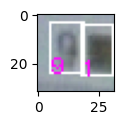

[(5, '9'), (18, '1')]


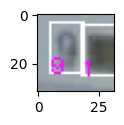

PERTURBED
% difference :  0.9899088541666666
[(2, '1'), (4, '1')]


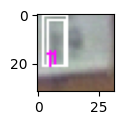

[(2, '1'), (4, '1')]


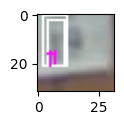

PERTURBED
% difference :  0.9970703125
[(16, '4')]


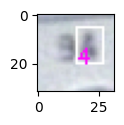

[(16, '4')]


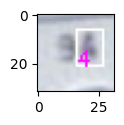

PERTURBED
% difference :  0.9983723958333334
[(20, '1')]


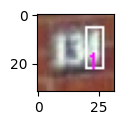

[(20, '1')]


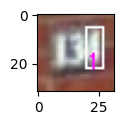

PERTURBED
% difference :  0.9944661458333334
[(2, '1'), (4, '1'), (11, '7')]


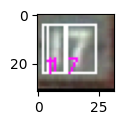

[(2, '1'), (4, '1'), (11, '7')]


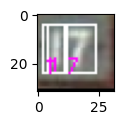

PERTURBED
% difference :  0.9798177083333334
[(4, '1'), (11, '8')]


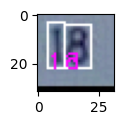

[(4, '1'), (11, '8')]


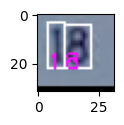

PERTURBED
% difference :  0.9703776041666666
[(5, '1'), (12, '3')]


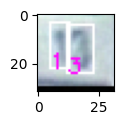

[(5, '1'), (12, '3')]


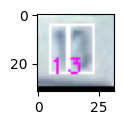

PERTURBED
% difference :  0.9957682291666666
[(5, '5'), (17, '6')]


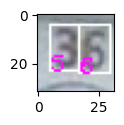

[(5, '5'), (17, '6')]


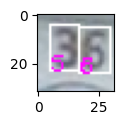

PERTURBED
% difference :  0.9970703125
[(2, '1'), (10, '0')]


In [ ]:
# Check the originval vs. Perturbation predictions

for i in range(len(org_list)):
    plt.subplots(figsize=(1,1))
    img_temp = get_img_with_boxes(org_list[i], org_ann_list[i])
    plt.imshow(img_temp)
    plt.show()
    
    print("PERTURBED")
    print("% difference : ", np.sum(perturbed_list[i]!=org_list[i])/np.sum(org_list[i]==org_list[i]))
    
    img_temp = get_img_with_boxes(perturbed_list[i], perturbed_ann_list[i])
    plt.subplots(figsize=(1,1))    
    plt.imshow(img_temp)
    plt.show()